In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
df.describe

<bound method NDFrame.describe of             ID  target        v1        v2 v3        v4         v5        v6  \
0            3       1  1.335739  8.727474  C  3.921026   7.915266  2.599278   
1            4       1       NaN       NaN  C       NaN   9.191265       NaN   
2            5       1  0.943877  5.310079  C  4.410969   5.326159  3.979592   
3            6       1  0.797415  8.304757  C  4.225930  11.627438  2.097700   
4            8       1       NaN       NaN  C       NaN        NaN       NaN   
...        ...     ...       ...       ... ..       ...        ...       ...   
114316  228708       1       NaN       NaN  C       NaN        NaN       NaN   
114317  228710       1       NaN       NaN  C       NaN        NaN       NaN   
114318  228711       1       NaN       NaN  C       NaN  10.069277       NaN   
114319  228712       1       NaN       NaN  C       NaN  10.106144       NaN   
114320  228713       1  1.619763  7.932978  C  4.640085   8.473141  2.351470   

     

In [5]:
df.info

<bound method DataFrame.info of             ID  target        v1        v2 v3        v4         v5        v6  \
0            3       1  1.335739  8.727474  C  3.921026   7.915266  2.599278   
1            4       1       NaN       NaN  C       NaN   9.191265       NaN   
2            5       1  0.943877  5.310079  C  4.410969   5.326159  3.979592   
3            6       1  0.797415  8.304757  C  4.225930  11.627438  2.097700   
4            8       1       NaN       NaN  C       NaN        NaN       NaN   
...        ...     ...       ...       ... ..       ...        ...       ...   
114316  228708       1       NaN       NaN  C       NaN        NaN       NaN   
114317  228710       1       NaN       NaN  C       NaN        NaN       NaN   
114318  228711       1       NaN       NaN  C       NaN  10.069277       NaN   
114319  228712       1       NaN       NaN  C       NaN  10.106144       NaN   
114320  228713       1  1.619763  7.932978  C  4.640085   8.473141  2.351470   

       

In [6]:
df=df.fillna(df.median())
df

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,1.469550,7.023803,C,4.205991,9.191265,2.412790,2.452166,2.301630,...,6.749117,2.739239,0.598896,AF,1.614802,2.963620,1.957825,0,1.560138,1.589403
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,1.469550,7.023803,C,4.205991,8.670867,2.412790,2.452166,0.386032,...,6.749117,2.739239,0.139864,Z,1.614802,2.963620,1.798436,0,1.560138,1.589403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,228708,1,1.469550,7.023803,C,4.205991,8.670867,2.412790,2.452166,0.386032,...,6.749117,2.739239,0.139864,AL,1.614802,2.963620,1.798436,0,1.560138,1.589403
114317,228710,1,1.469550,7.023803,C,4.205991,8.670867,2.412790,2.452166,0.386032,...,6.749117,2.739239,0.139864,E,1.614802,2.963620,1.798436,1,1.560138,1.589403
114318,228711,1,1.469550,7.023803,C,4.205991,10.069277,2.412790,2.452166,0.323324,...,6.749117,2.739239,0.156764,Q,1.614802,2.963620,2.417606,2,1.560138,1.589403
114319,228712,1,1.469550,7.023803,C,4.205991,10.106144,2.412790,2.452166,0.309226,...,6.749117,2.739239,0.490658,BW,1.614802,2.963620,3.526650,0,1.560138,1.589403


In [7]:
df.isna().sum()

ID           0
target       0
v1           0
v2           0
v3        3457
          ... 
v127         0
v128         0
v129         0
v130         0
v131         0
Length: 133, dtype: int64

In [8]:
df= df.fillna(df.mode().iloc[0])
df

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,1.469550,7.023803,C,4.205991,9.191265,2.412790,2.452166,2.301630,...,6.749117,2.739239,0.598896,AF,1.614802,2.963620,1.957825,0,1.560138,1.589403
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,1.469550,7.023803,C,4.205991,8.670867,2.412790,2.452166,0.386032,...,6.749117,2.739239,0.139864,Z,1.614802,2.963620,1.798436,0,1.560138,1.589403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,228708,1,1.469550,7.023803,C,4.205991,8.670867,2.412790,2.452166,0.386032,...,6.749117,2.739239,0.139864,AL,1.614802,2.963620,1.798436,0,1.560138,1.589403
114317,228710,1,1.469550,7.023803,C,4.205991,8.670867,2.412790,2.452166,0.386032,...,6.749117,2.739239,0.139864,E,1.614802,2.963620,1.798436,1,1.560138,1.589403
114318,228711,1,1.469550,7.023803,C,4.205991,10.069277,2.412790,2.452166,0.323324,...,6.749117,2.739239,0.156764,Q,1.614802,2.963620,2.417606,2,1.560138,1.589403
114319,228712,1,1.469550,7.023803,C,4.205991,10.106144,2.412790,2.452166,0.309226,...,6.749117,2.739239,0.490658,BW,1.614802,2.963620,3.526650,0,1.560138,1.589403


In [9]:
df.isna().sum()

ID        0
target    0
v1        0
v2        0
v3        0
         ..
v127      0
v128      0
v129      0
v130      0
v131      0
Length: 133, dtype: int64

In [10]:
numeric_data=df.select_dtypes(include=[np.number])
numeric_data.shape[1]

114

In [11]:
categorical_data=df.select_dtypes(exclude=[np.number])
categorical_data.shape[1]

19

In [12]:
l=df.select_dtypes(include=['object']).columns.tolist()
l

['v3',
 'v22',
 'v24',
 'v30',
 'v31',
 'v47',
 'v52',
 'v56',
 'v66',
 'v71',
 'v74',
 'v75',
 'v79',
 'v91',
 'v107',
 'v110',
 'v112',
 'v113',
 'v125']

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def labelEncode(data, col):
    for i in col:
        data[i] = le.fit_transform(data[i])

labelEncode(df, l)

In [14]:
numeric_data=df.select_dtypes(include=[np.number])
numeric_data.shape[1]

133

In [15]:
categorical_data=df.select_dtypes(exclude=[np.number])
categorical_data.shape[1]

0

In [16]:
colnames = df.columns[2:]
colnames

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       ...
       'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=131)

In [17]:
def detect(m, n, dt):
    sns.boxplot(x=m, y=n, data=dt)
    plt.show()

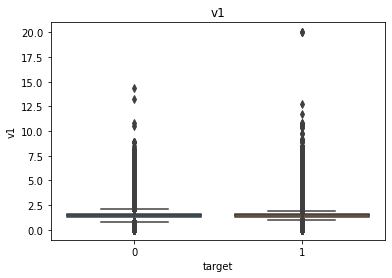

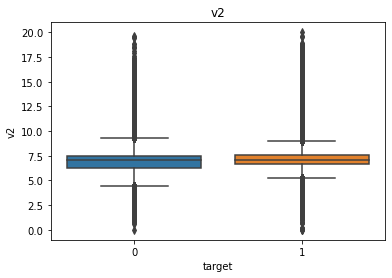

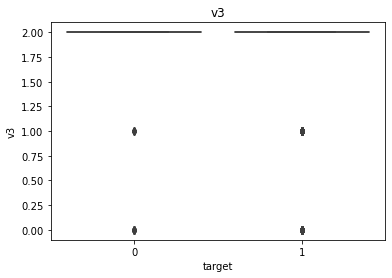

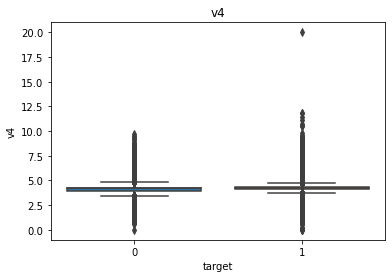

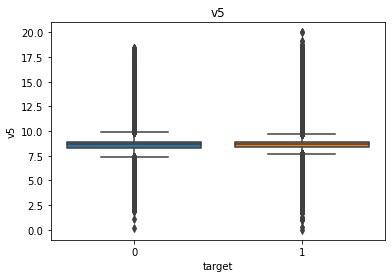

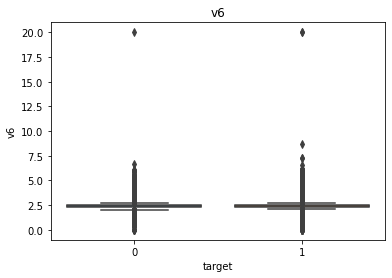

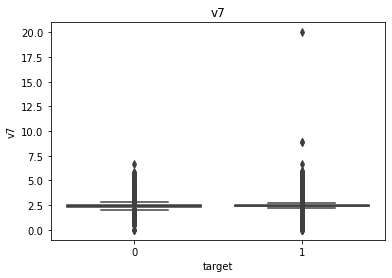

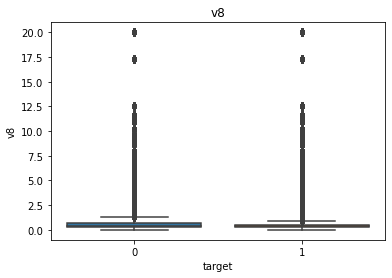

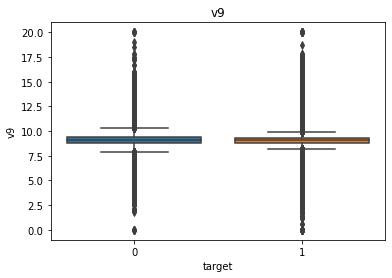

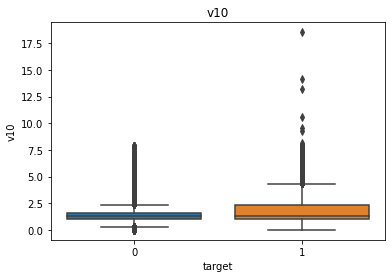

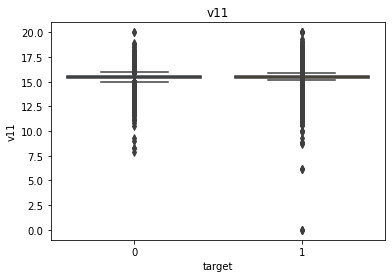

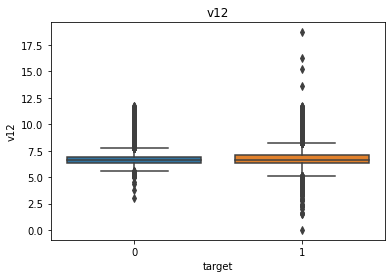

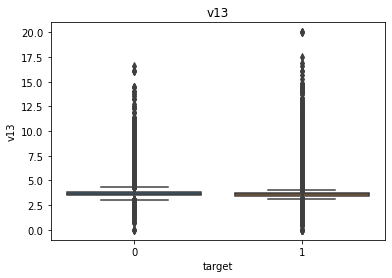

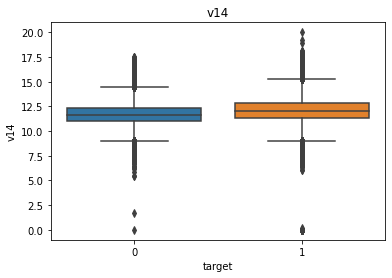

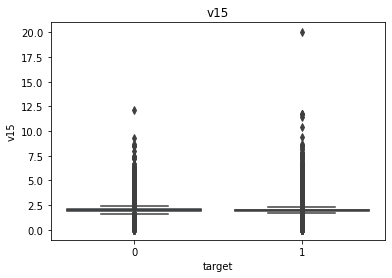

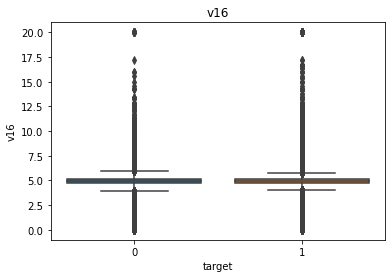

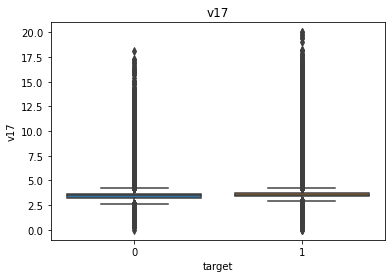

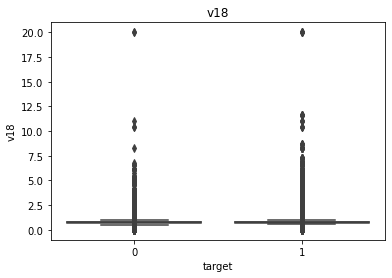

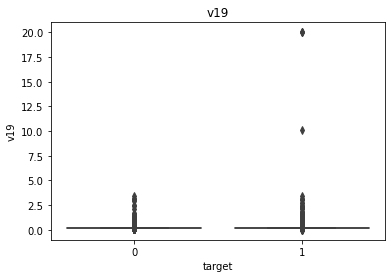

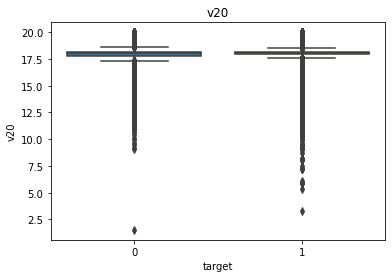

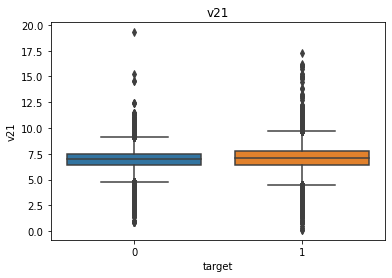

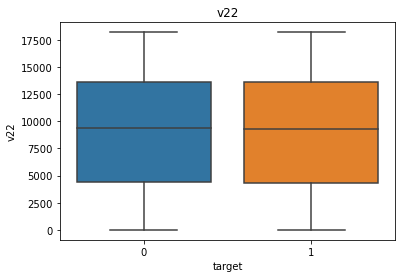

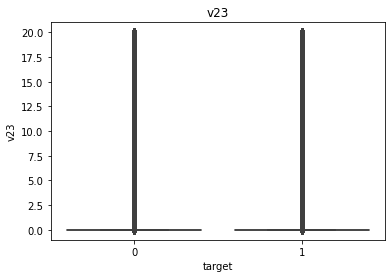

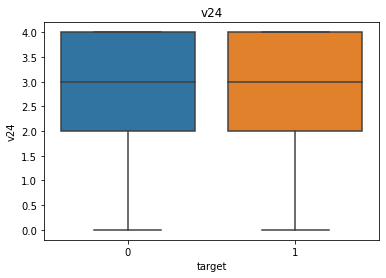

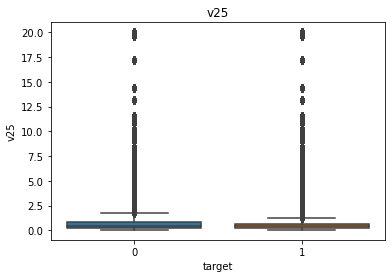

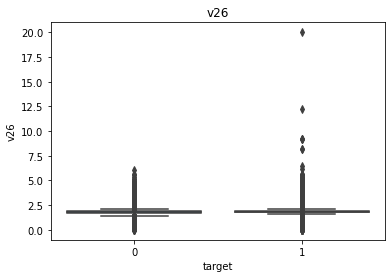

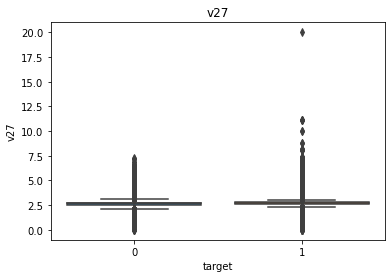

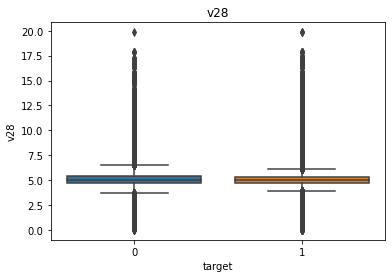

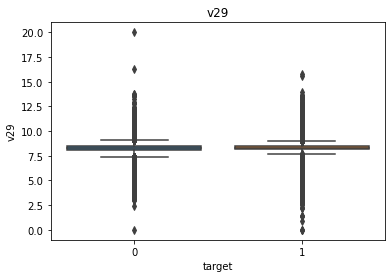

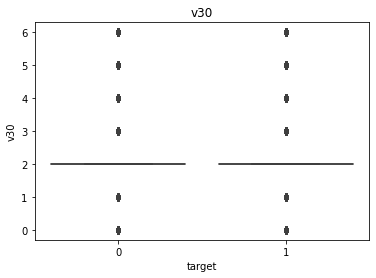

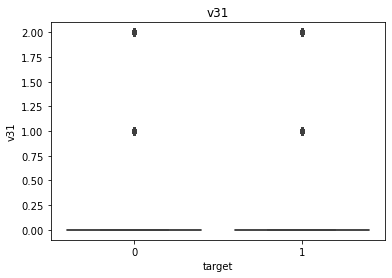

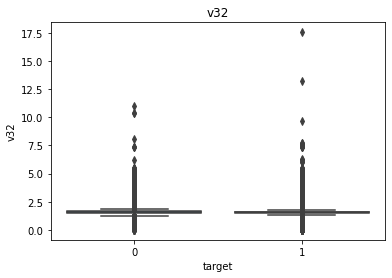

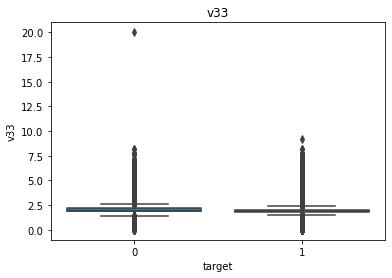

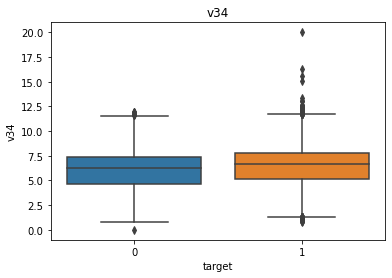

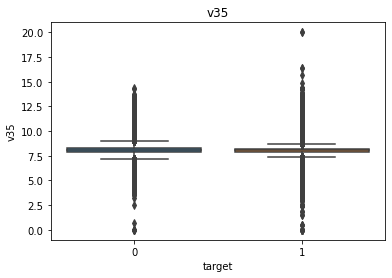

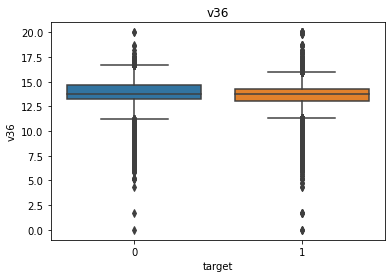

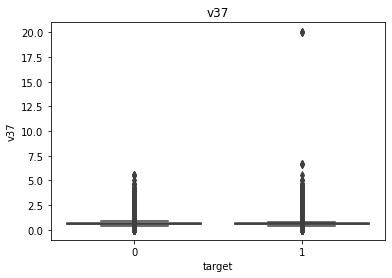

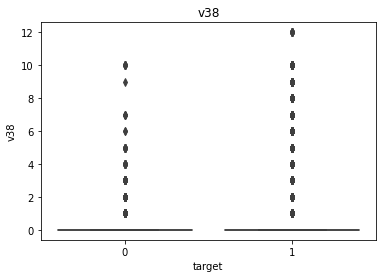

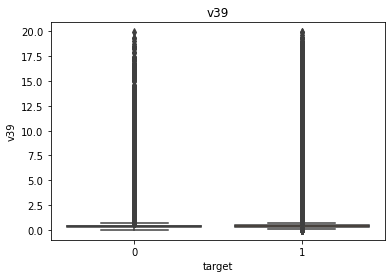

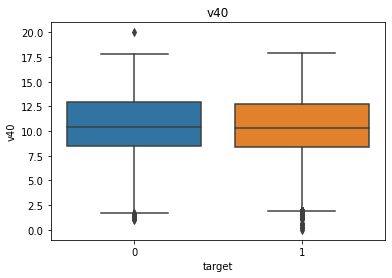

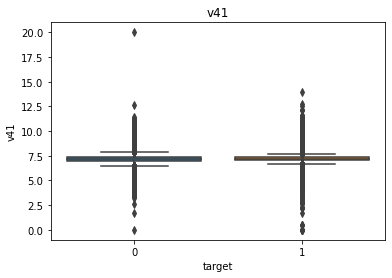

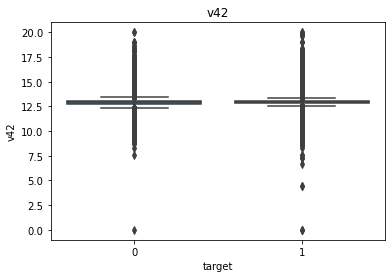

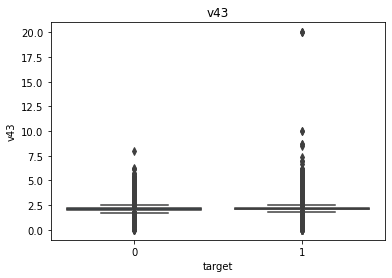

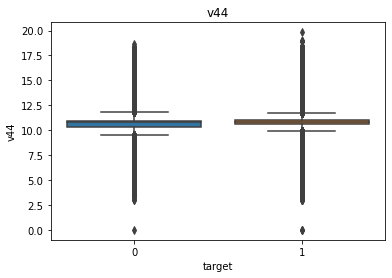

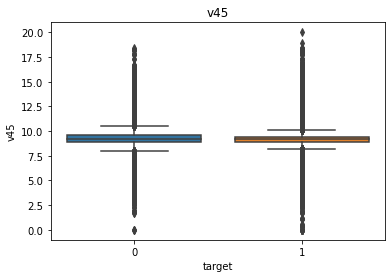

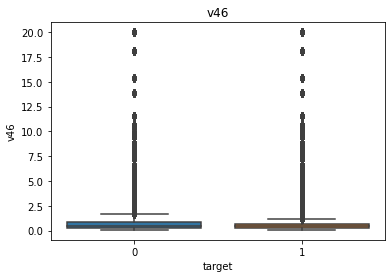

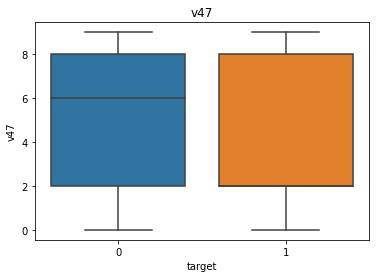

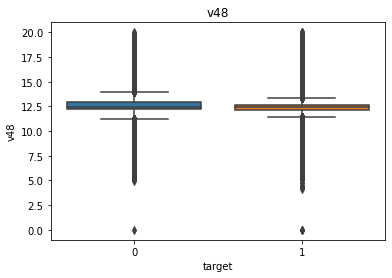

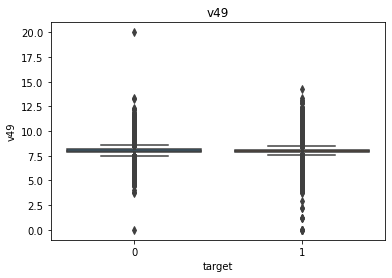

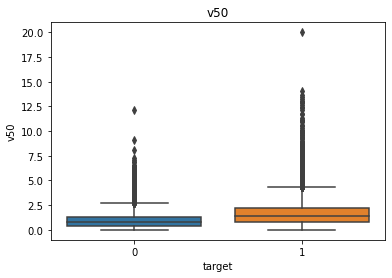

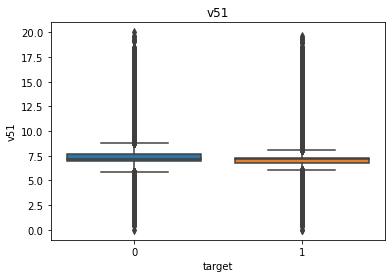

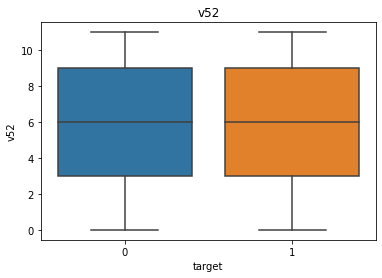

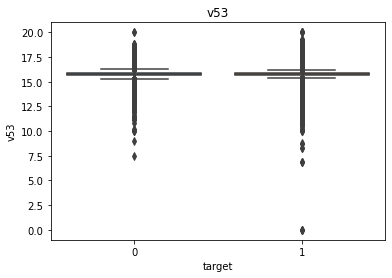

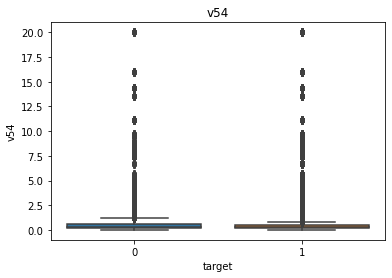

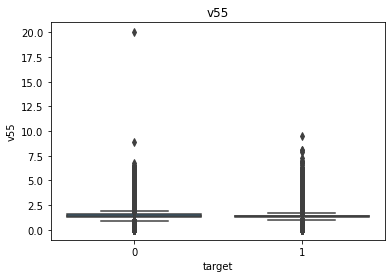

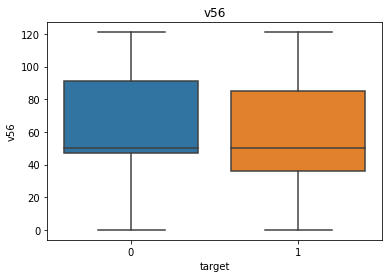

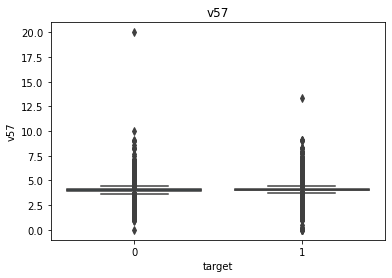

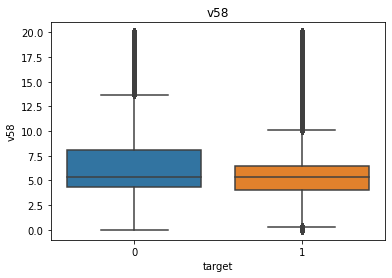

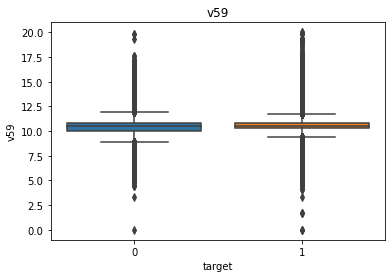

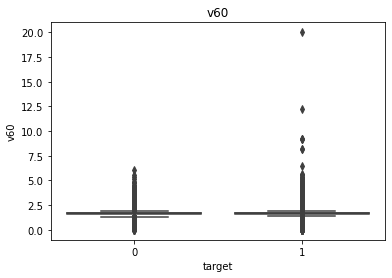

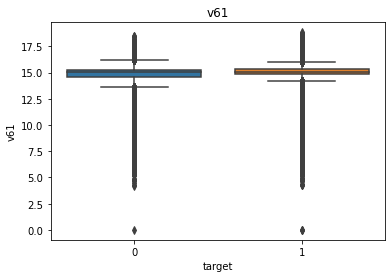

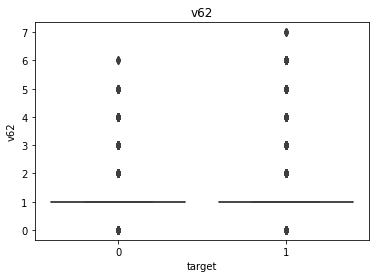

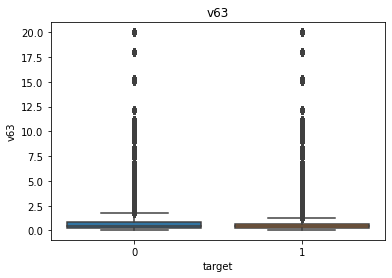

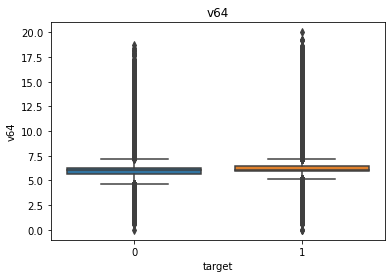

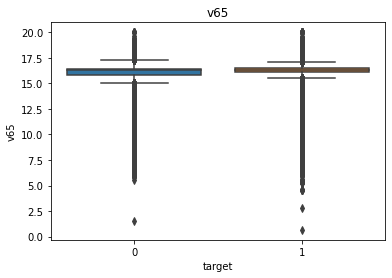

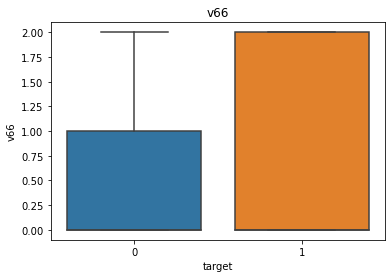

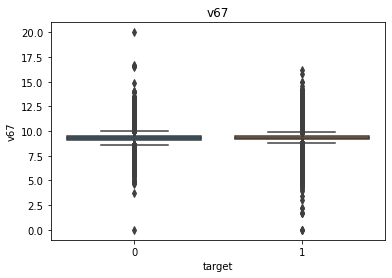

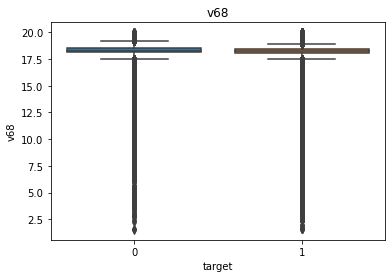

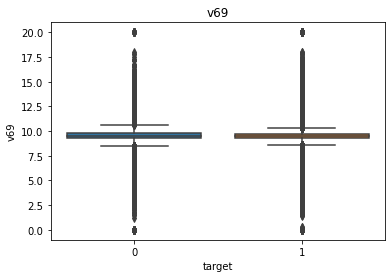

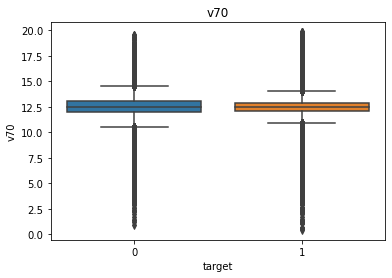

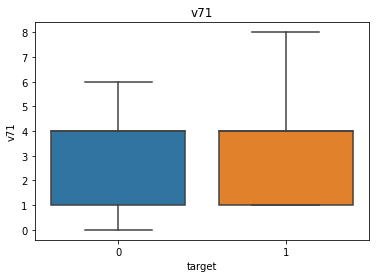

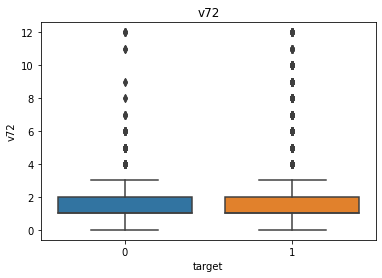

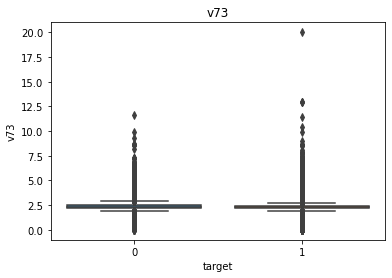

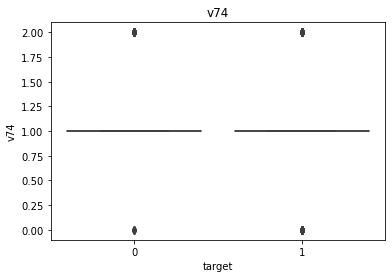

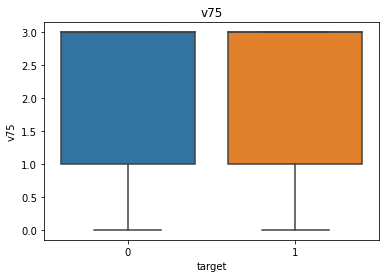

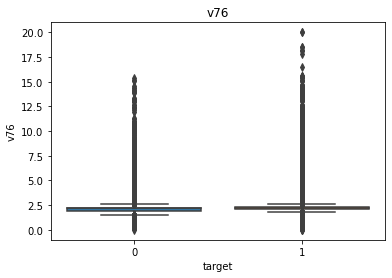

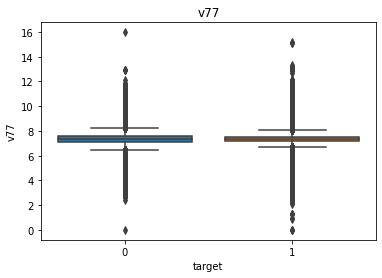

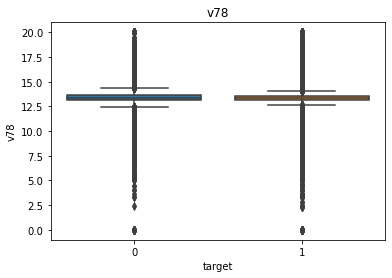

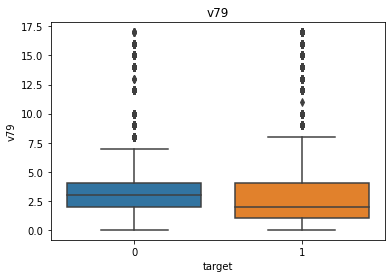

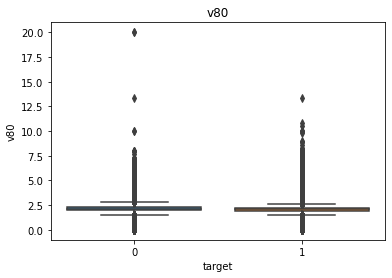

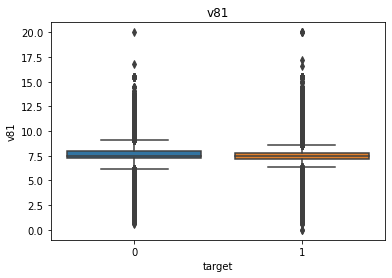

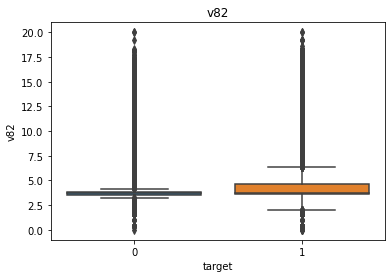

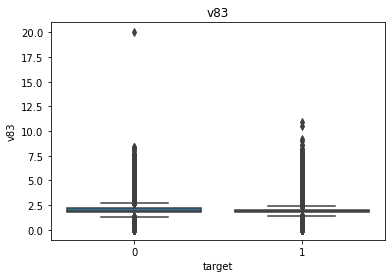

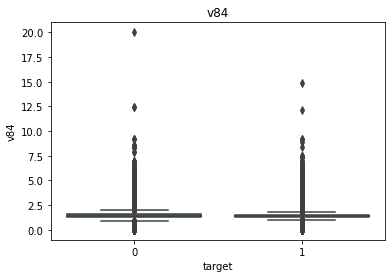

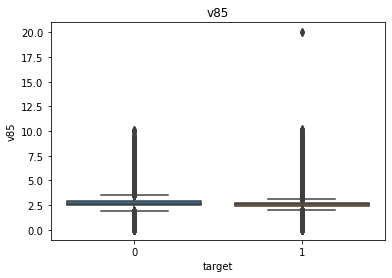

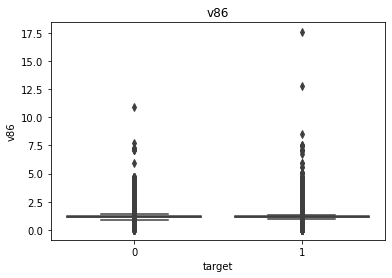

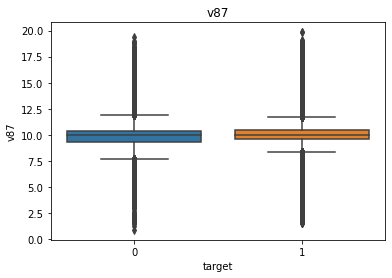

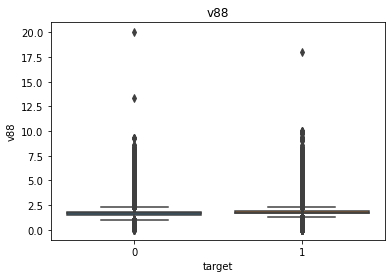

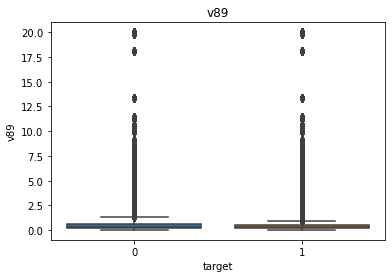

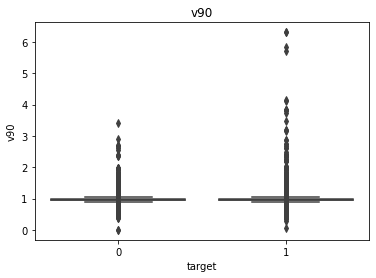

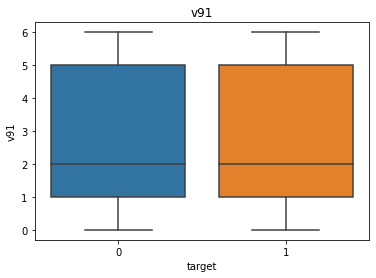

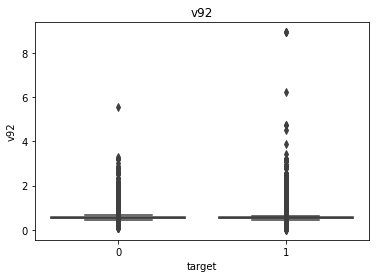

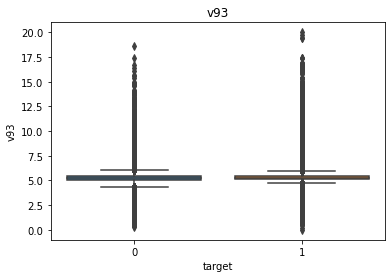

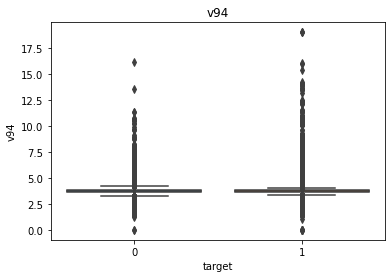

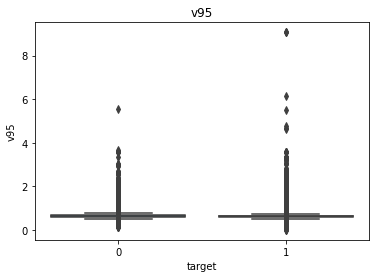

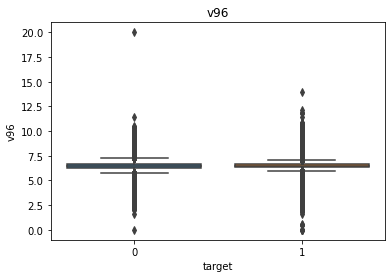

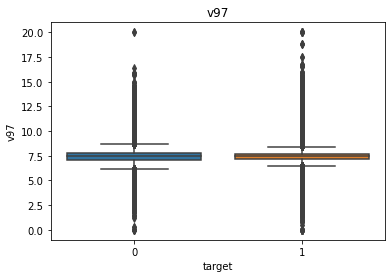

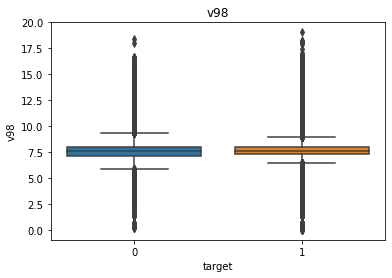

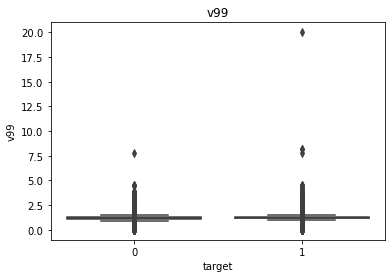

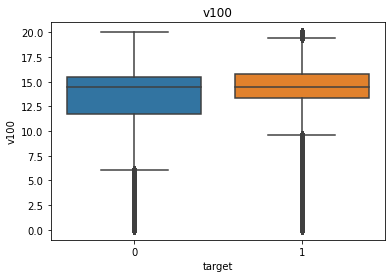

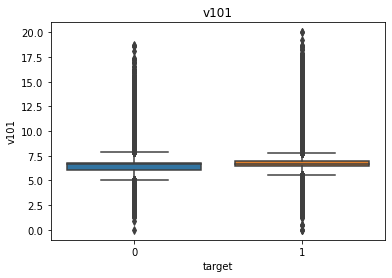

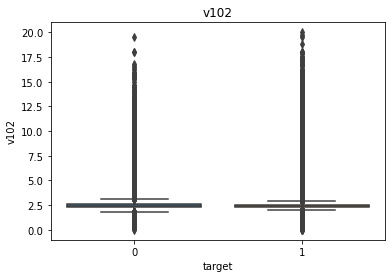

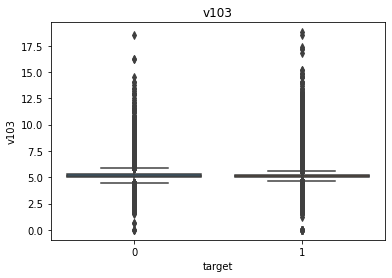

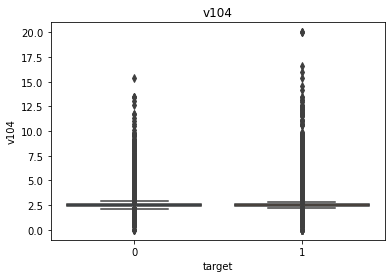

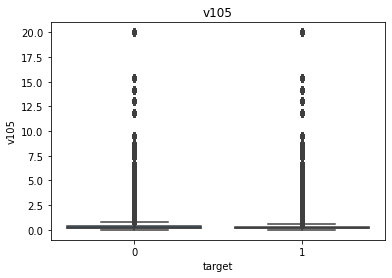

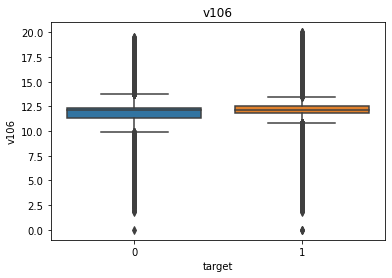

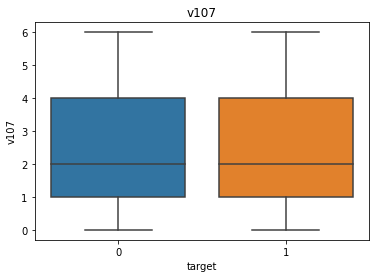

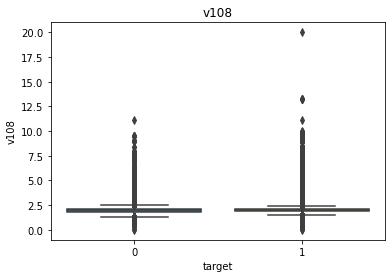

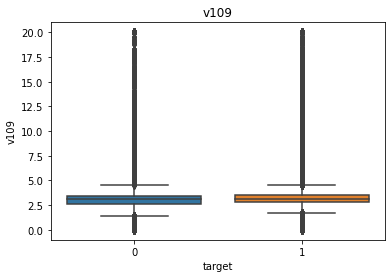

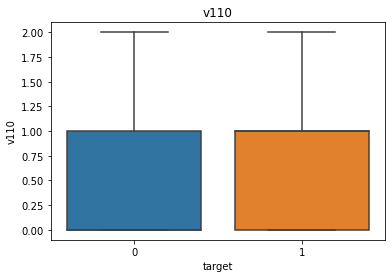

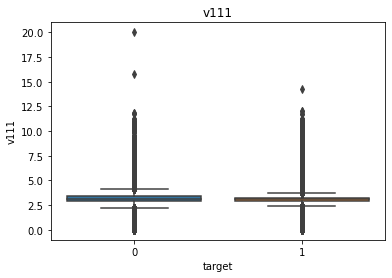

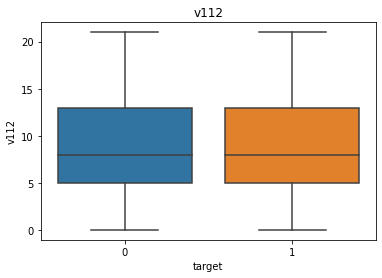

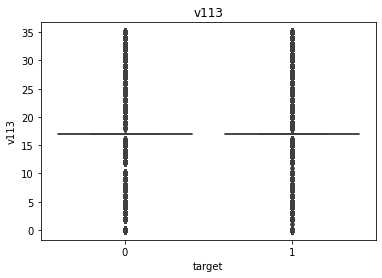

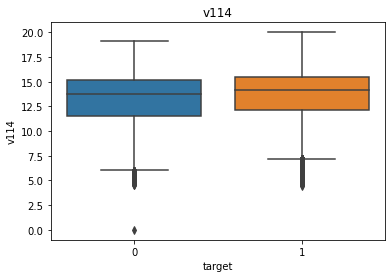

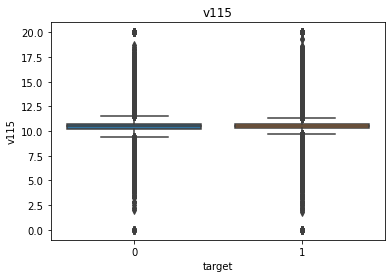

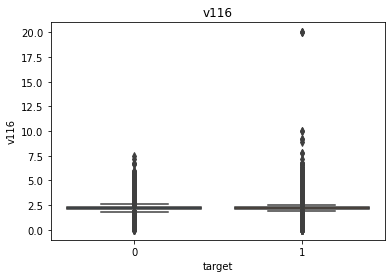

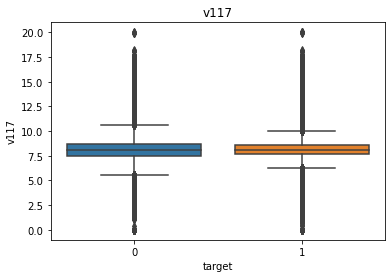

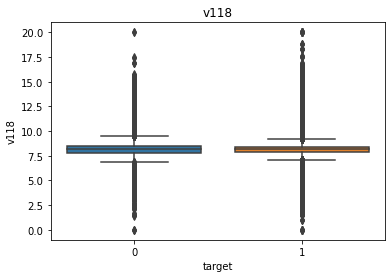

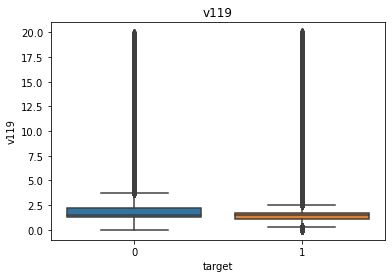

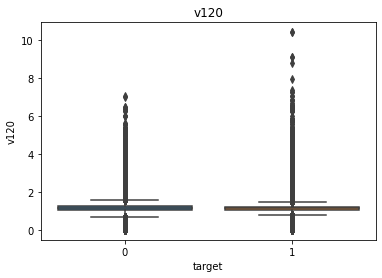

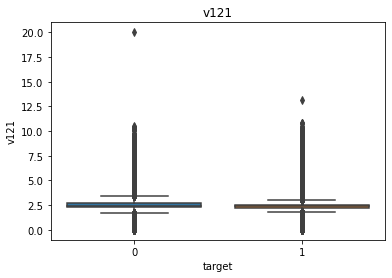

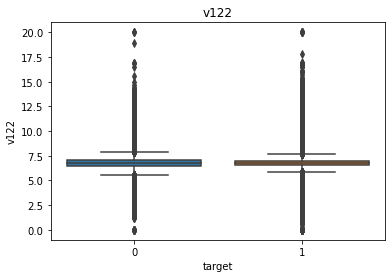

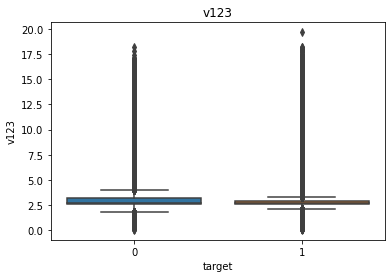

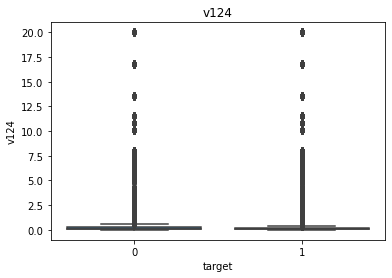

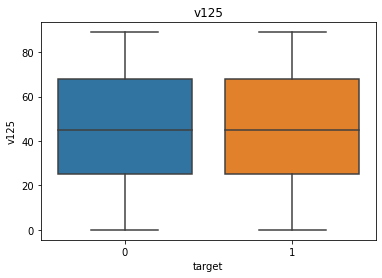

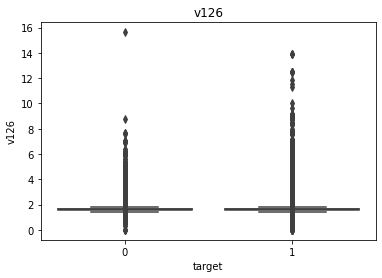

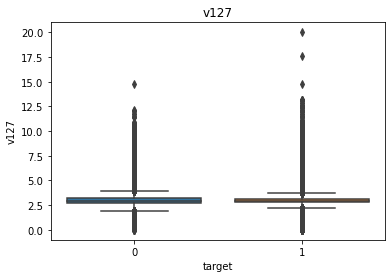

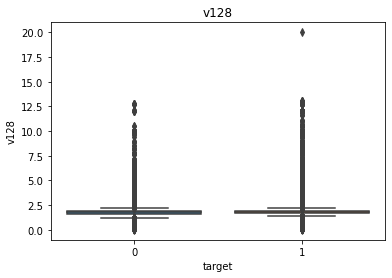

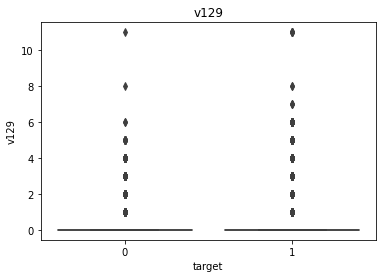

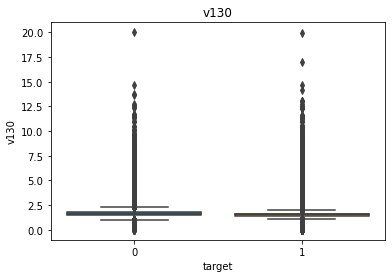

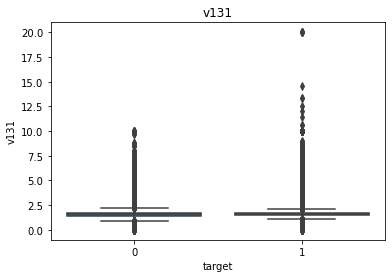

In [19]:
#plt.figure(figsize=(20,8))
for i in range(len(colnames)):
    plt.title("{}".format(colnames[i]))
    detect(df['target'], colnames[i], df)
    

In [21]:
# scatter plot
def scatter(m, n, dt):
    plt.scatter(x=m, y=n, data=dt)
    plt.show()

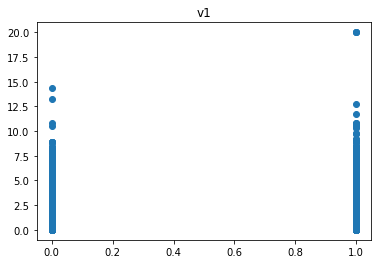

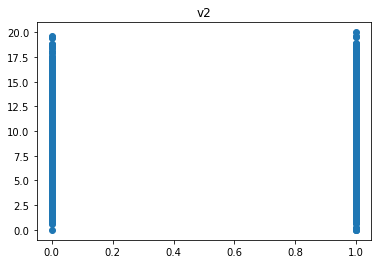

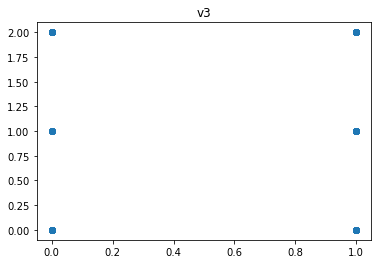

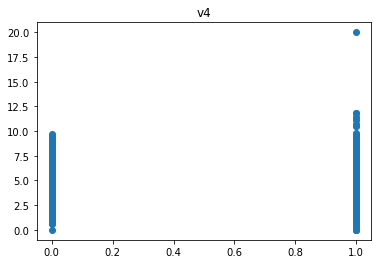

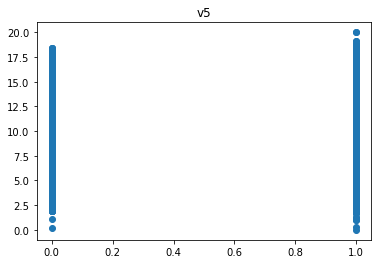

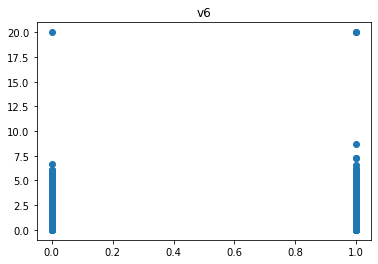

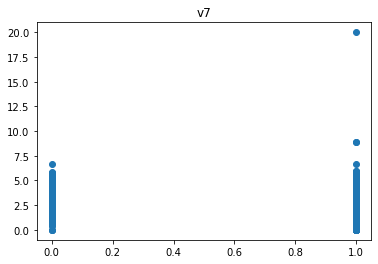

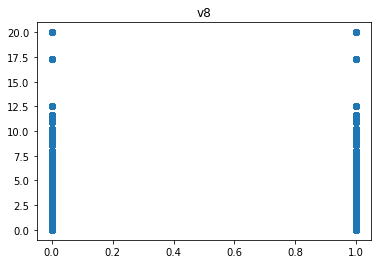

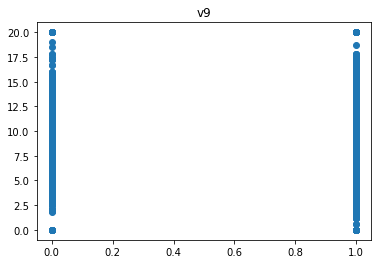

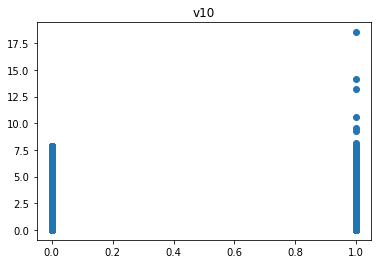

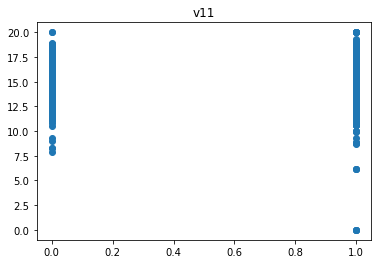

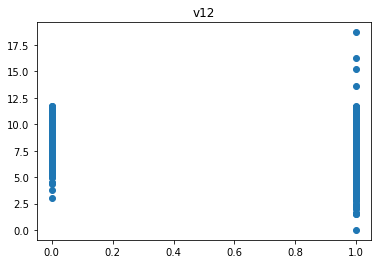

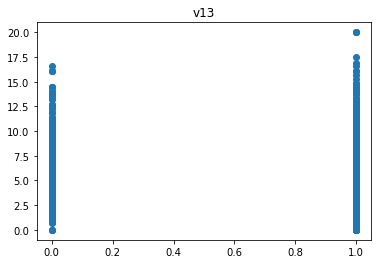

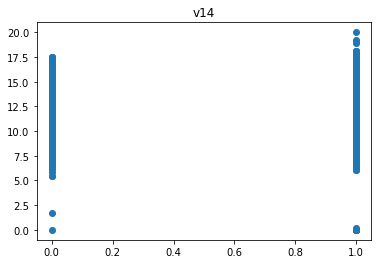

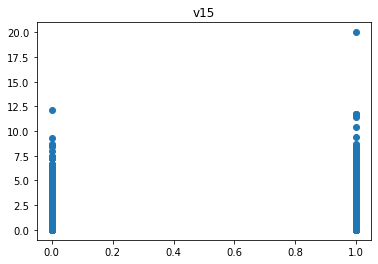

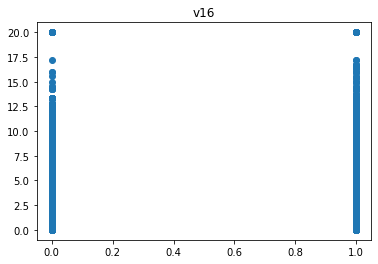

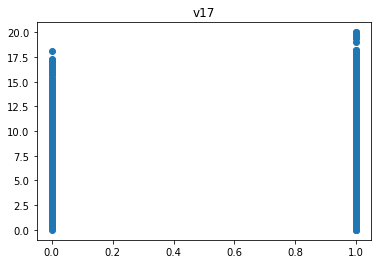

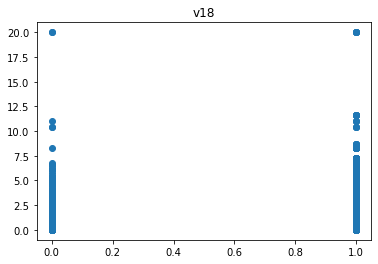

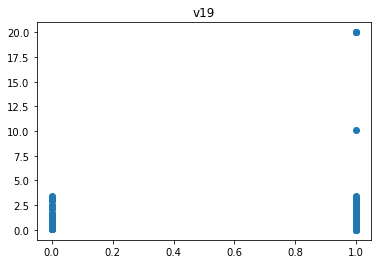

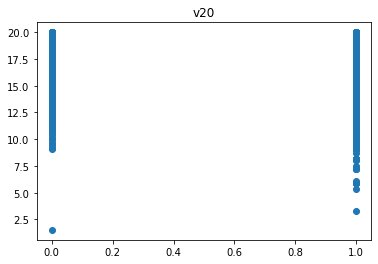

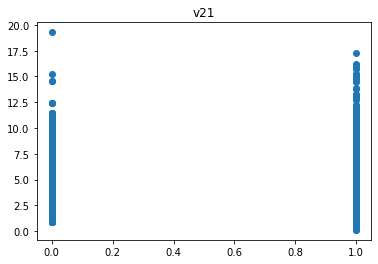

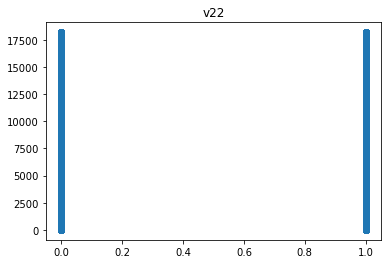

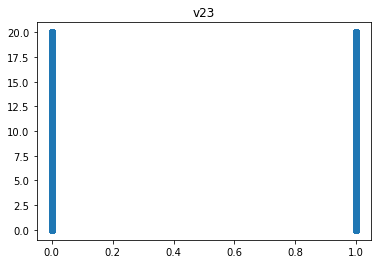

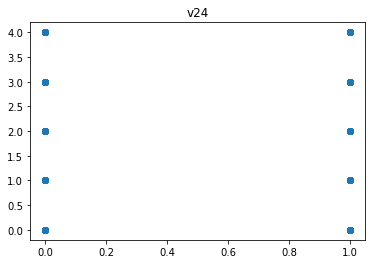

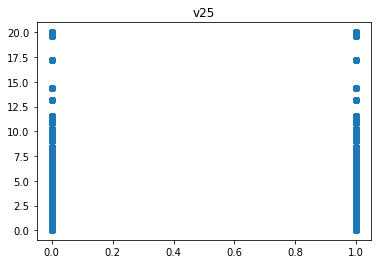

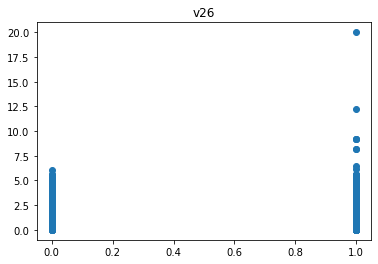

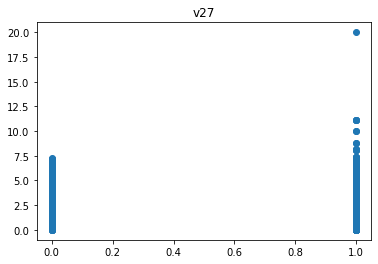

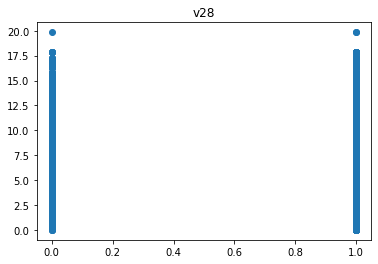

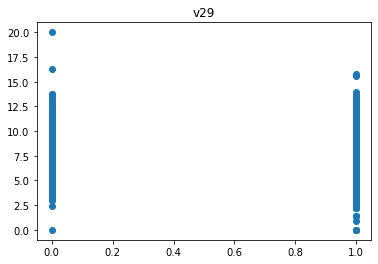

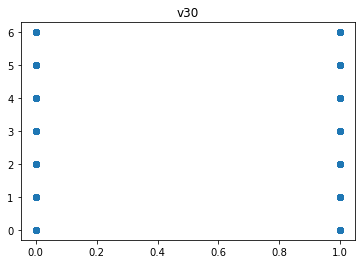

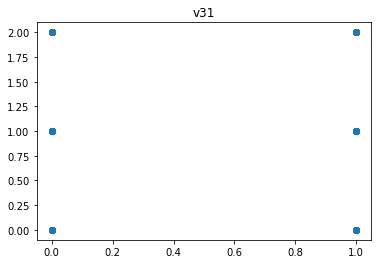

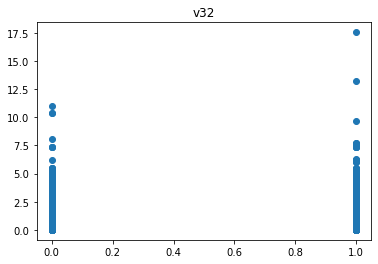

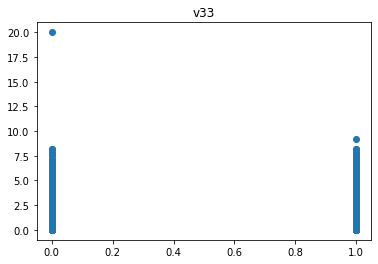

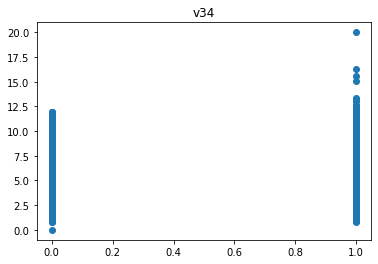

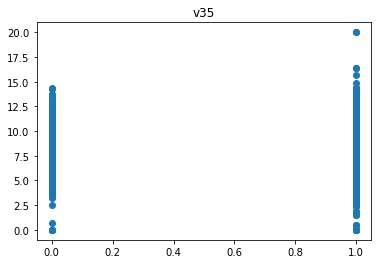

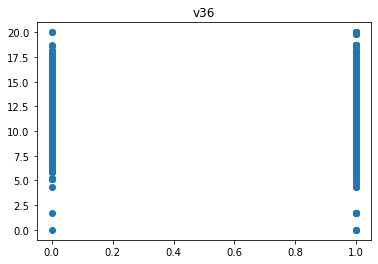

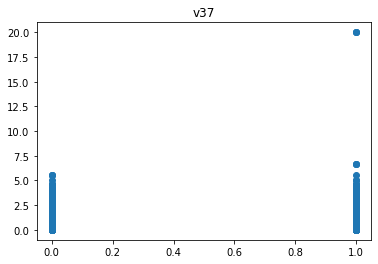

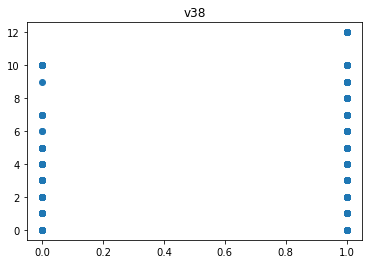

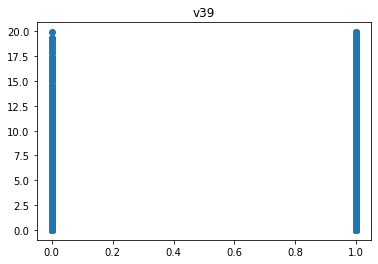

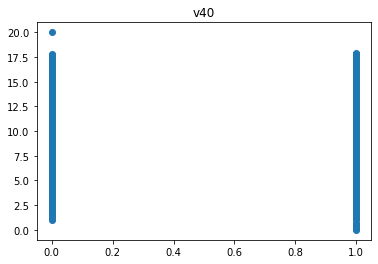

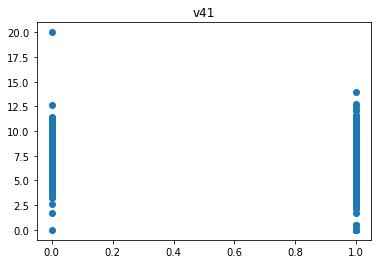

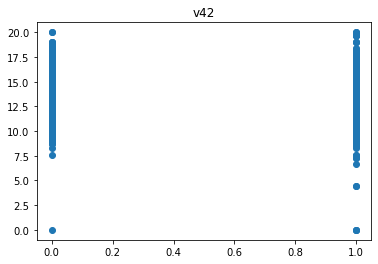

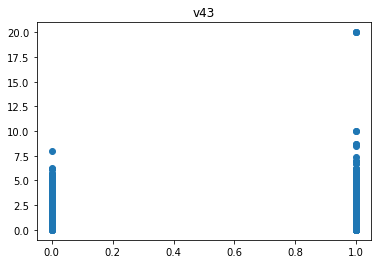

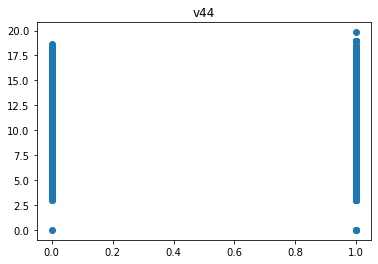

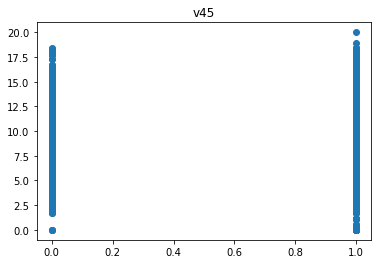

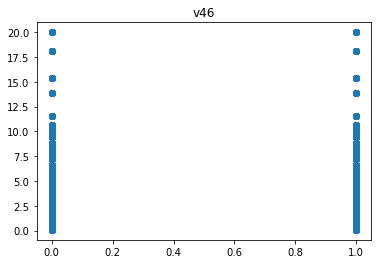

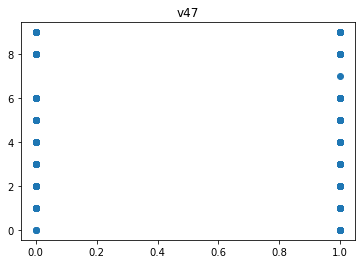

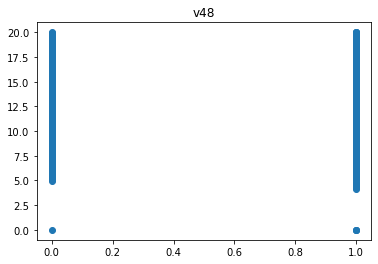

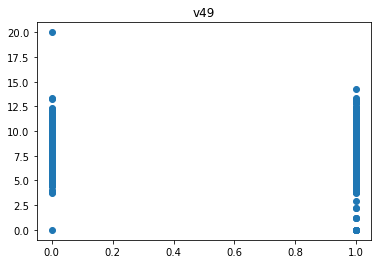

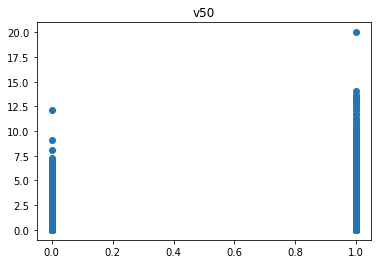

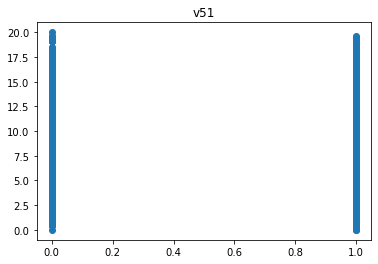

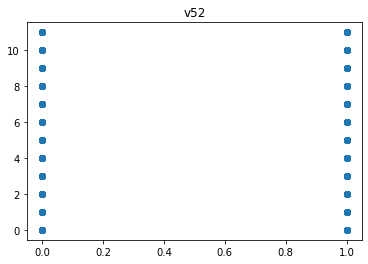

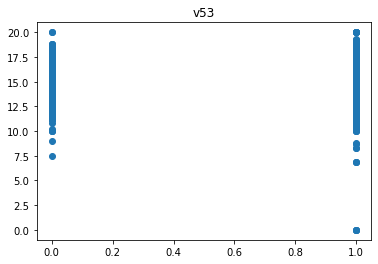

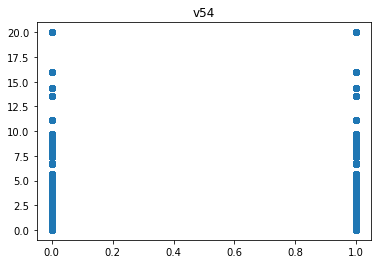

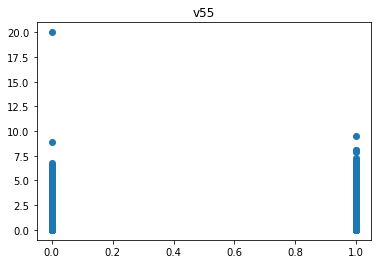

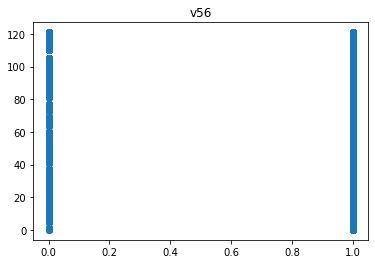

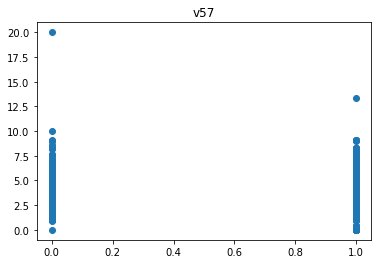

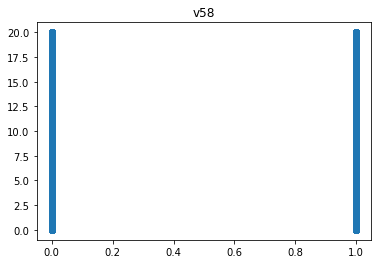

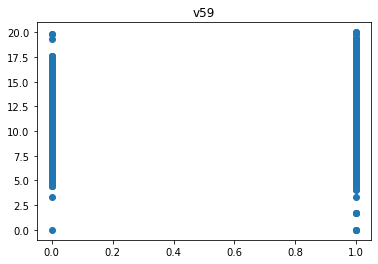

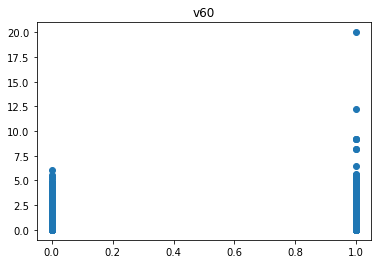

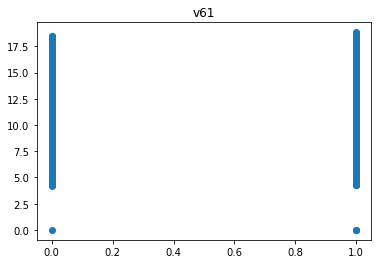

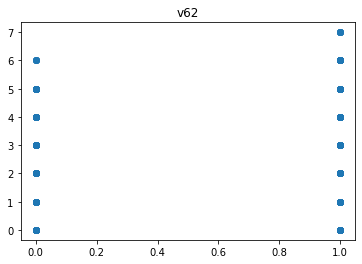

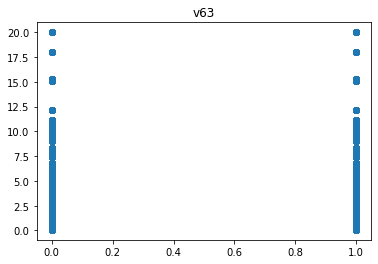

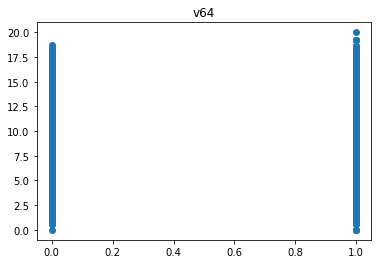

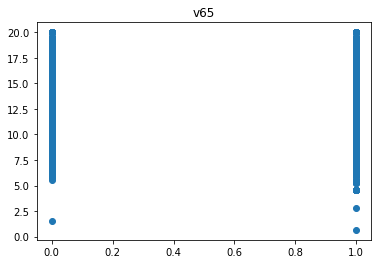

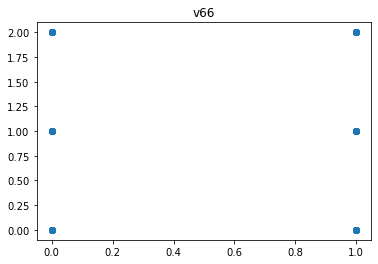

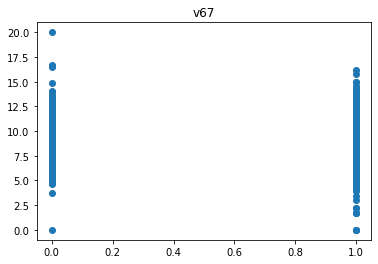

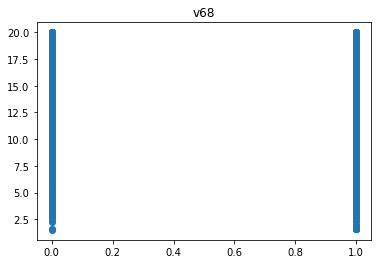

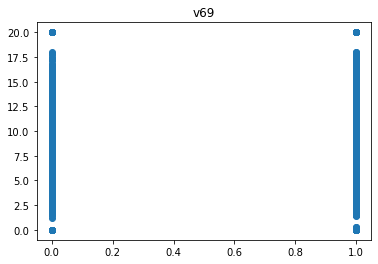

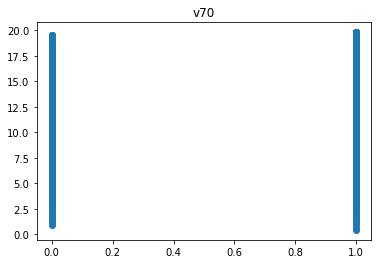

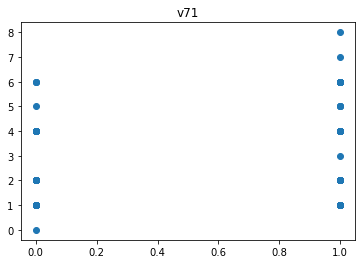

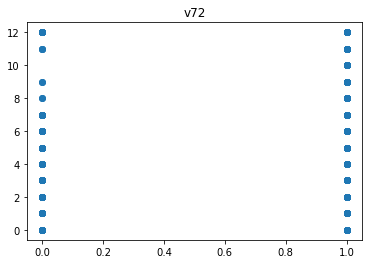

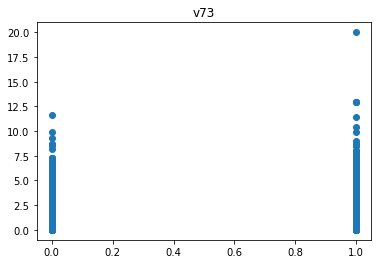

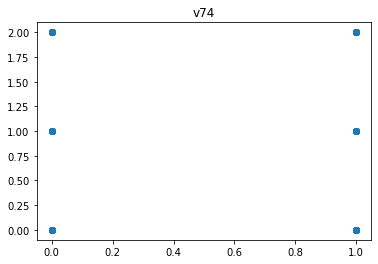

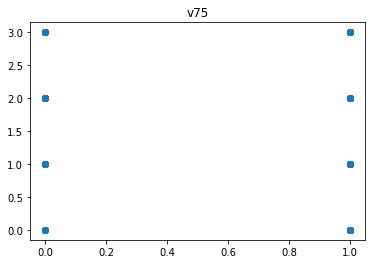

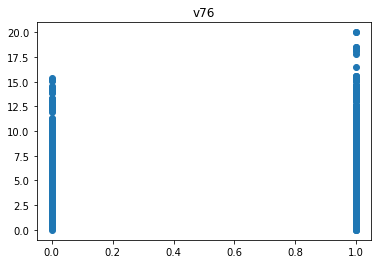

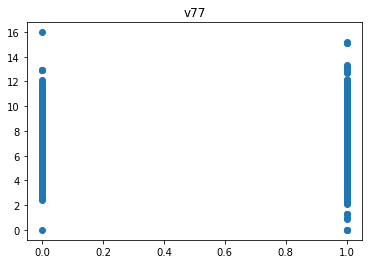

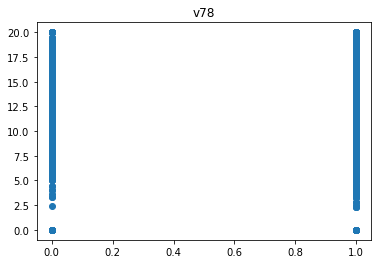

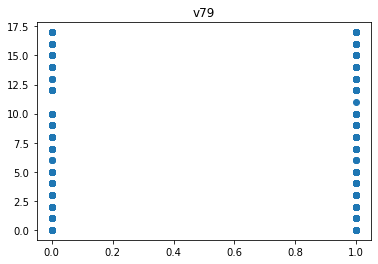

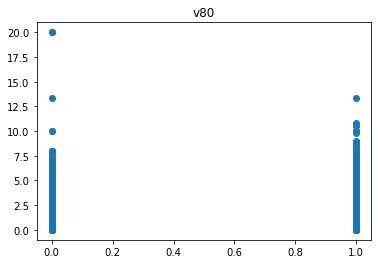

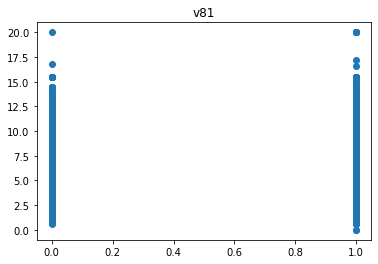

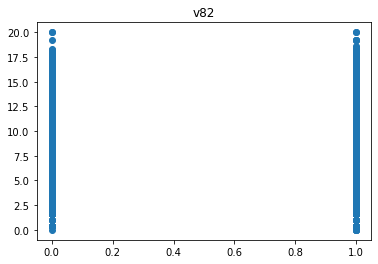

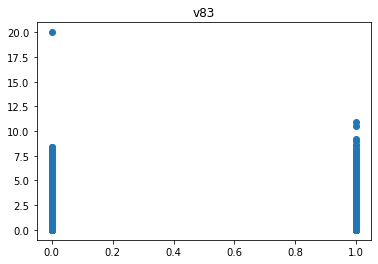

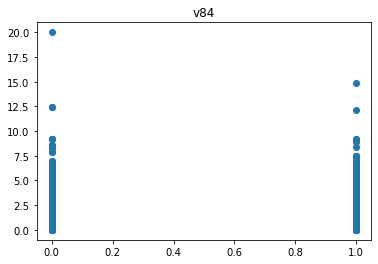

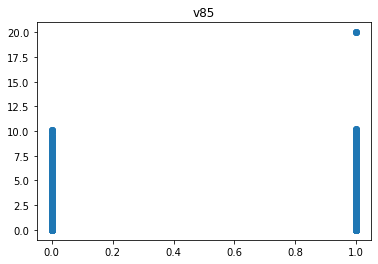

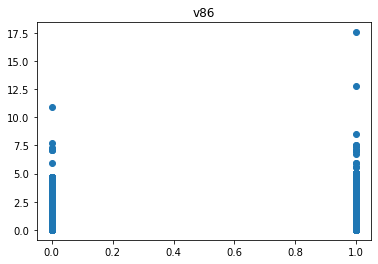

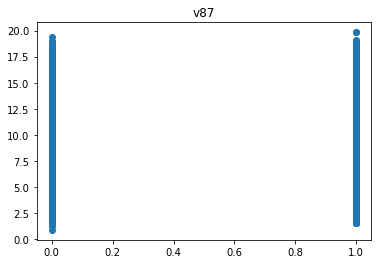

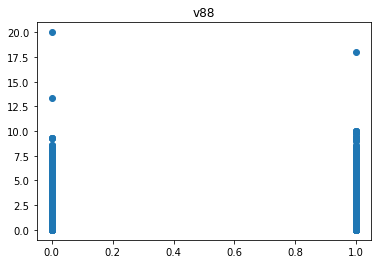

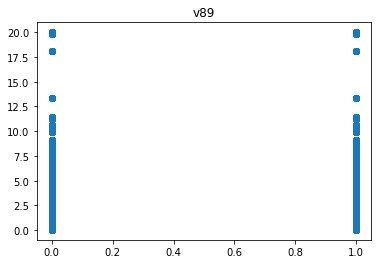

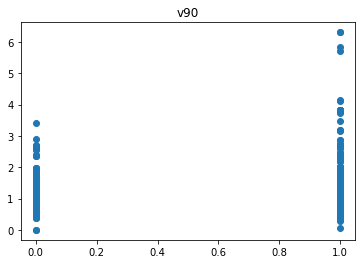

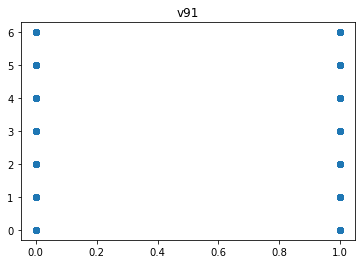

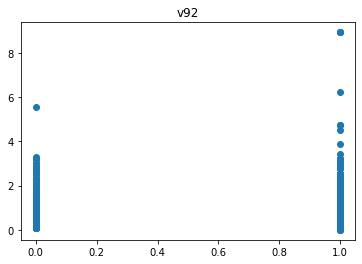

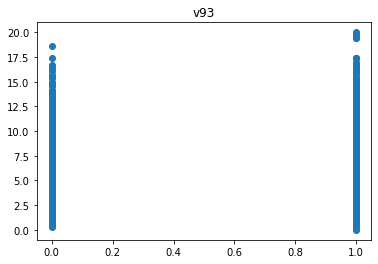

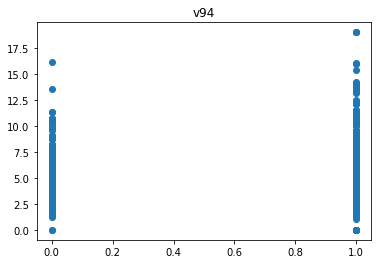

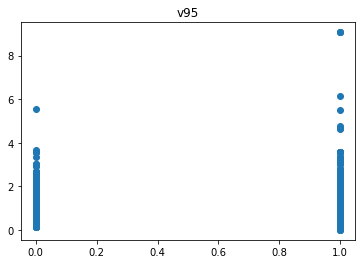

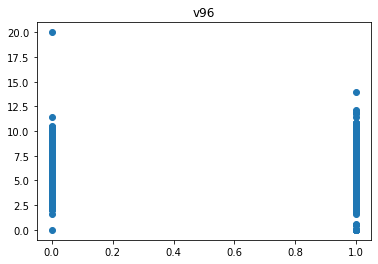

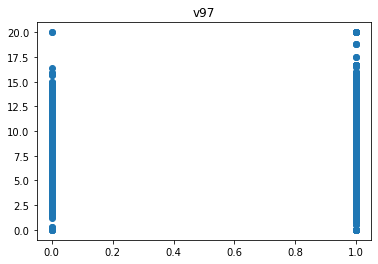

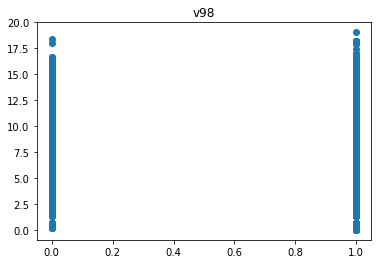

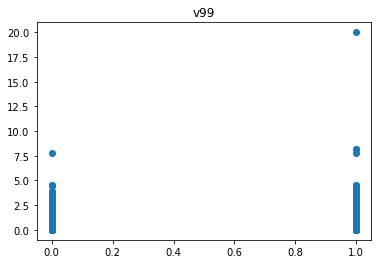

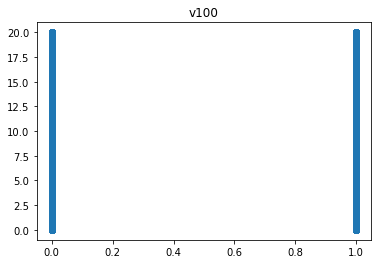

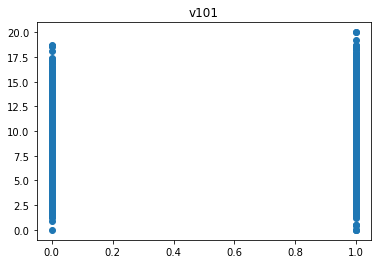

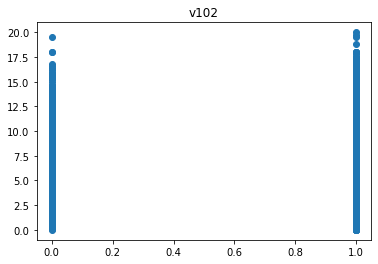

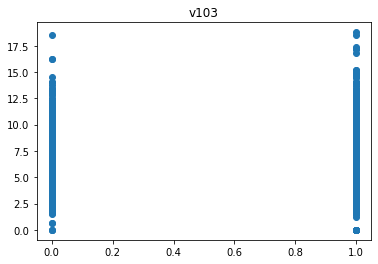

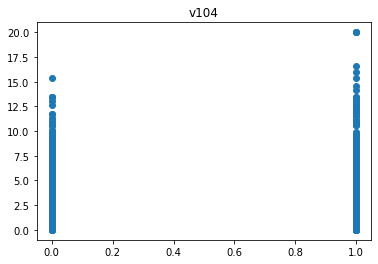

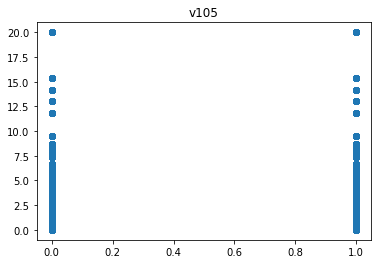

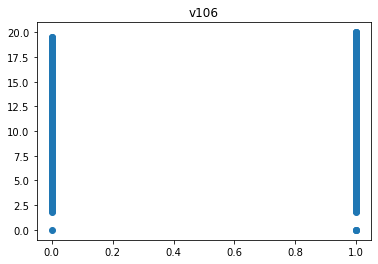

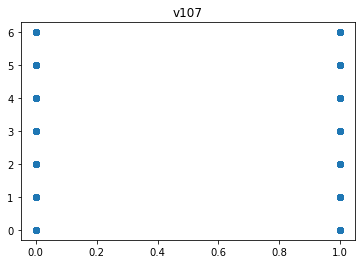

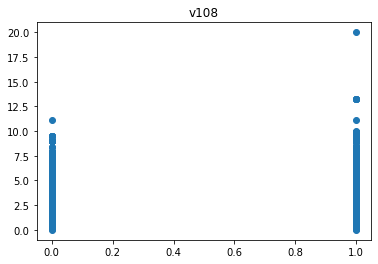

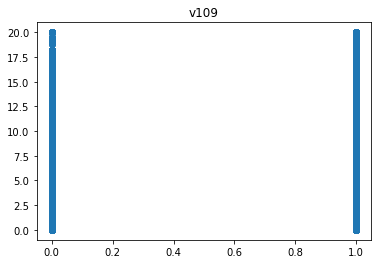

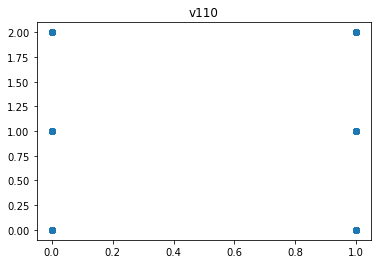

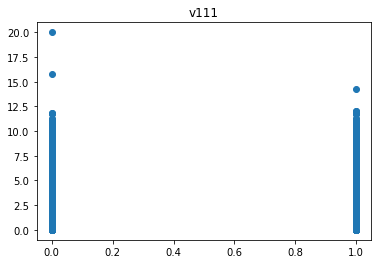

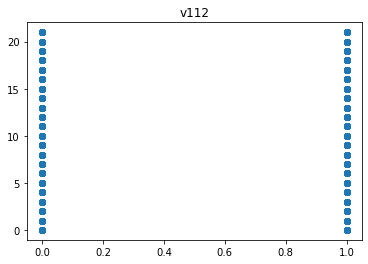

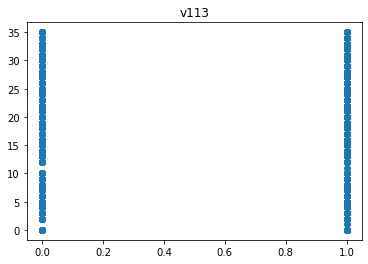

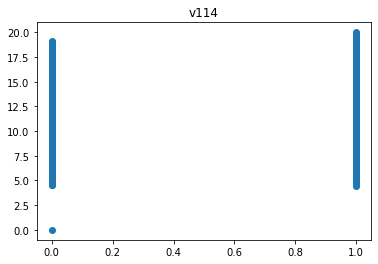

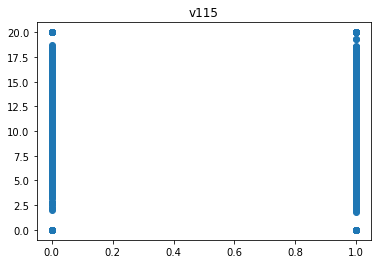

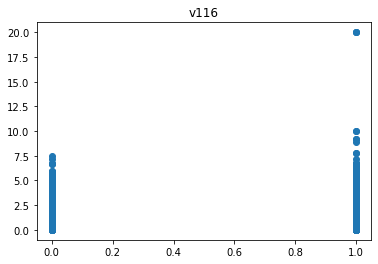

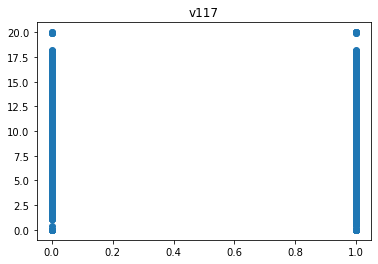

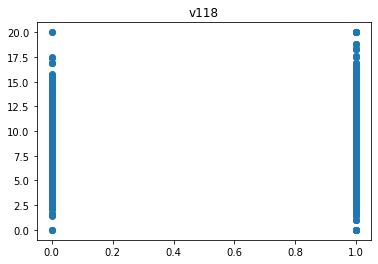

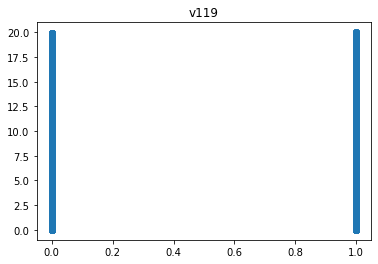

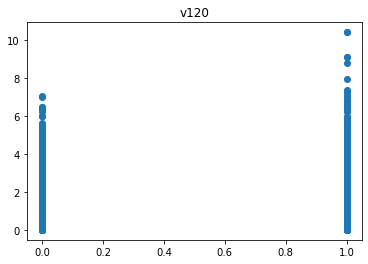

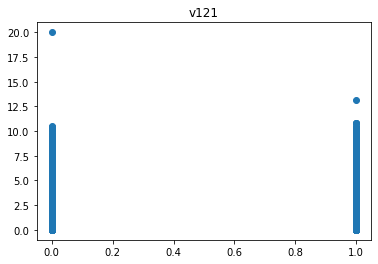

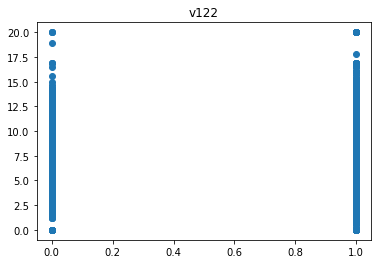

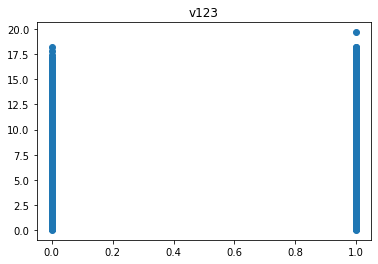

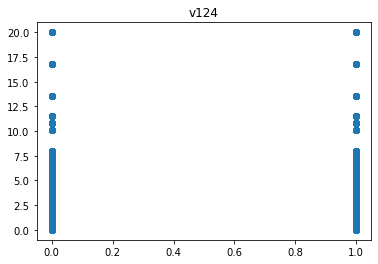

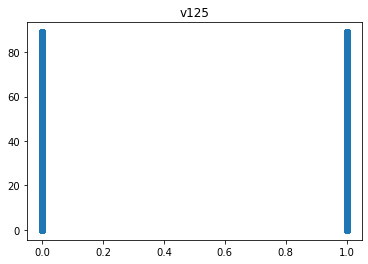

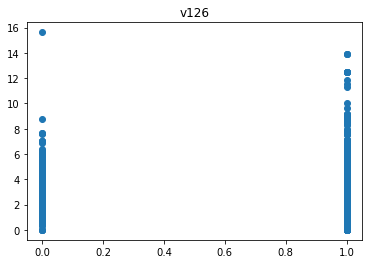

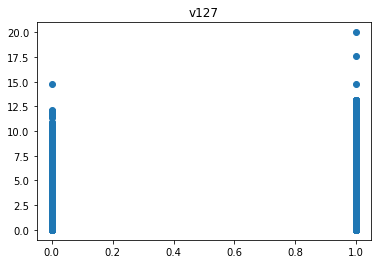

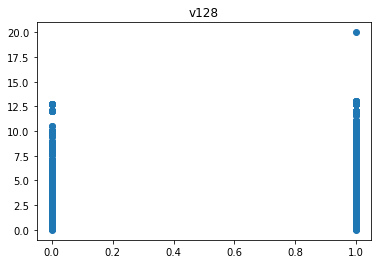

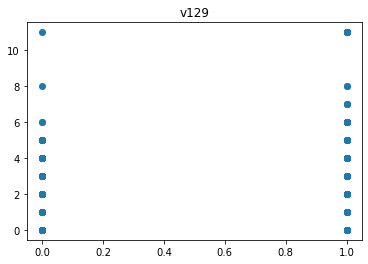

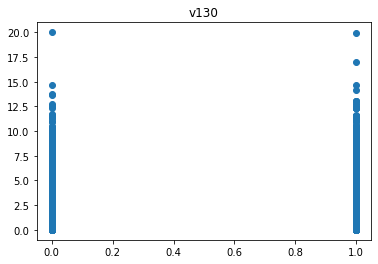

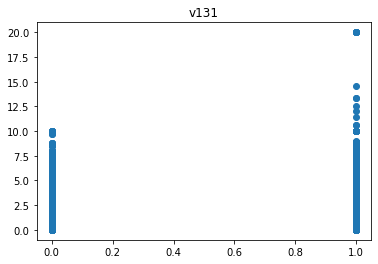

In [22]:
for i in range(len(colnames)):
    plt.title("{}".format(colnames[i]))
    scatter(df['target'], colnames[i], df)
    

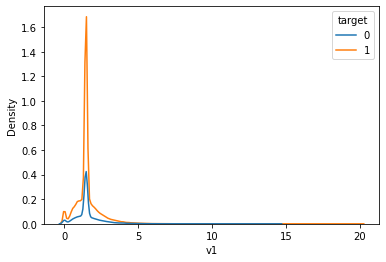

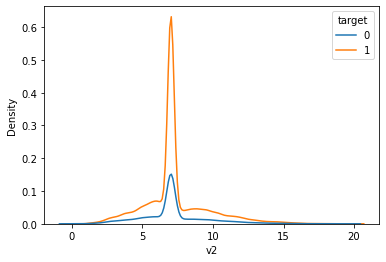

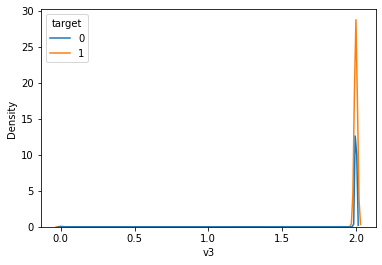

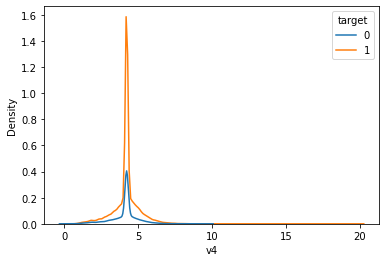

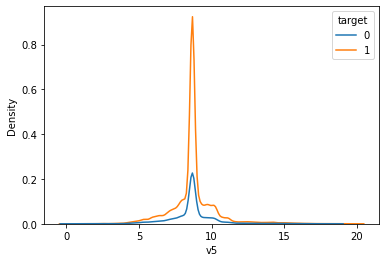

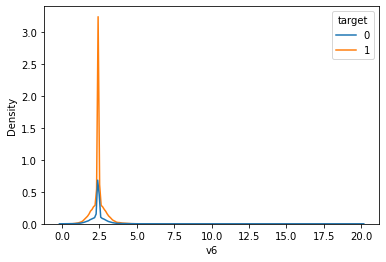

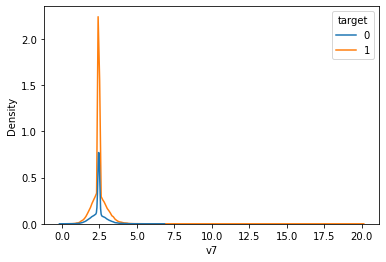

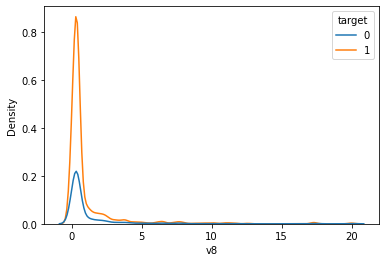

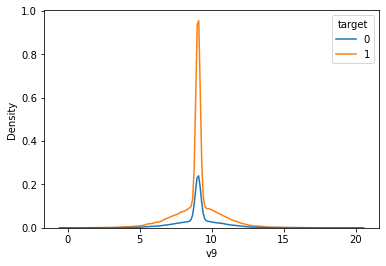

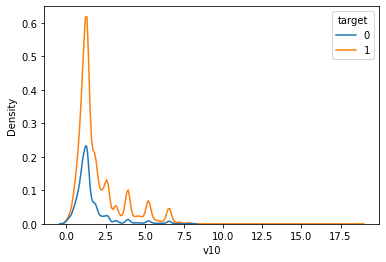

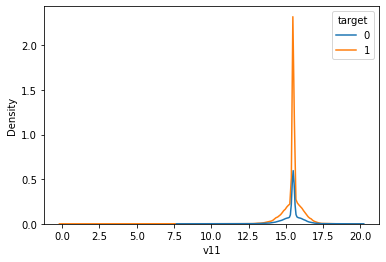

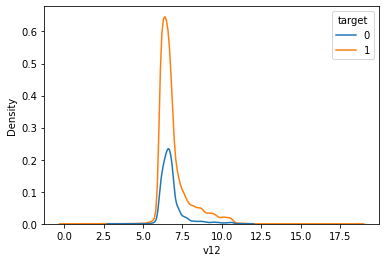

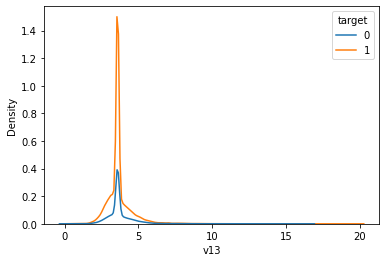

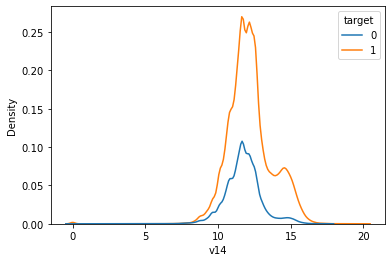

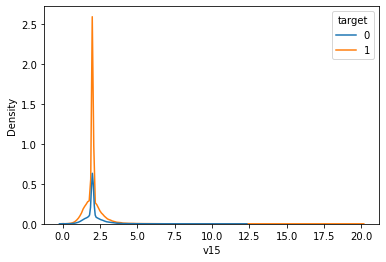

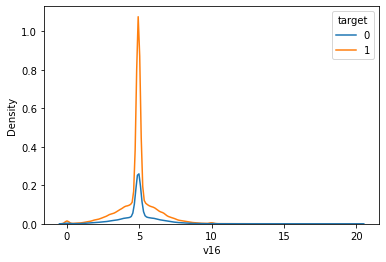

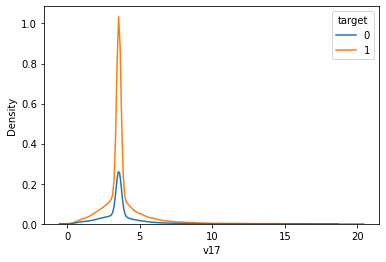

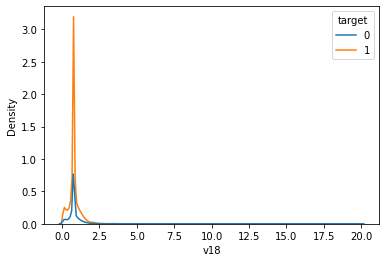

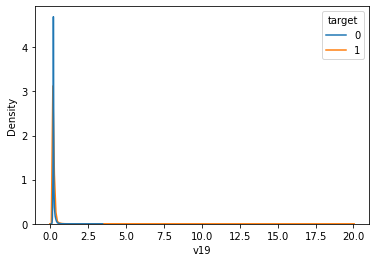

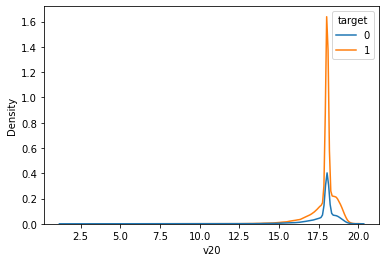

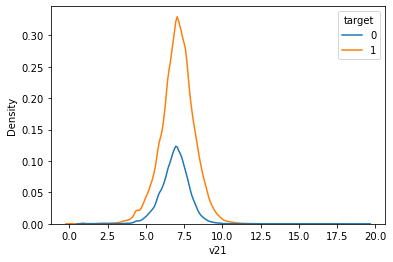

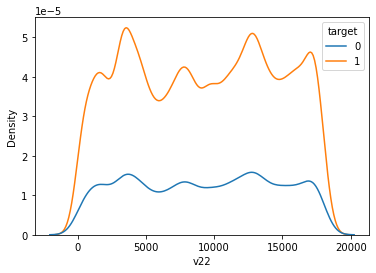

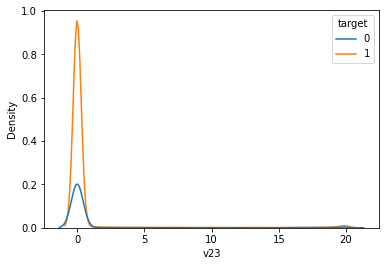

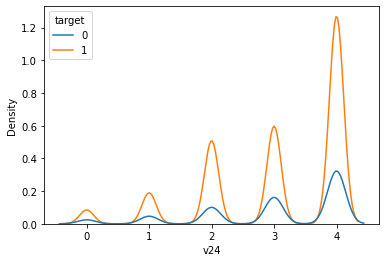

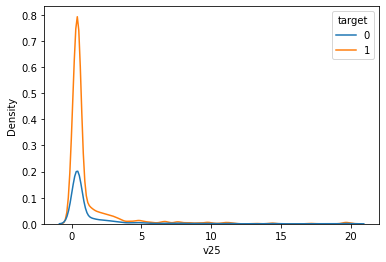

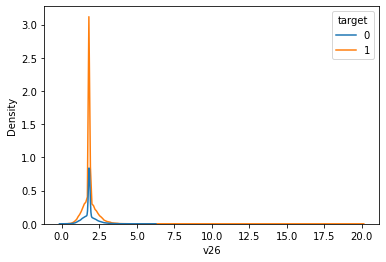

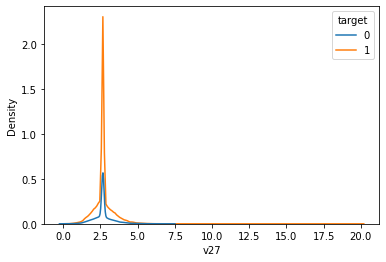

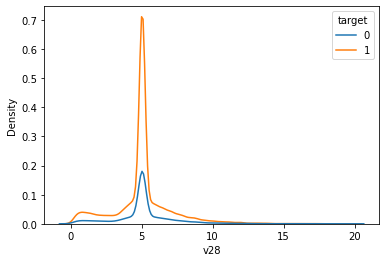

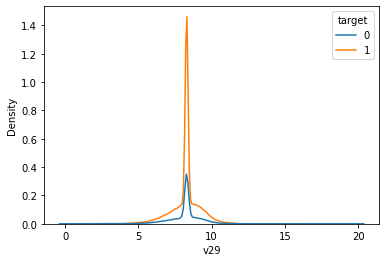

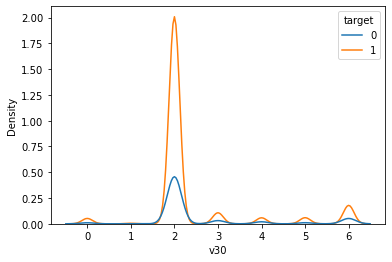

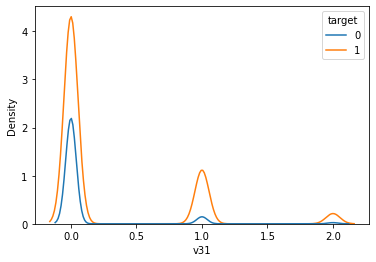

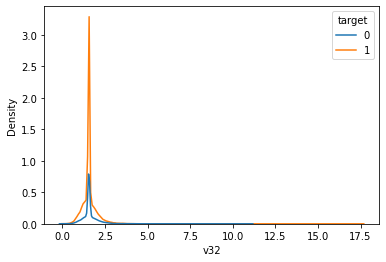

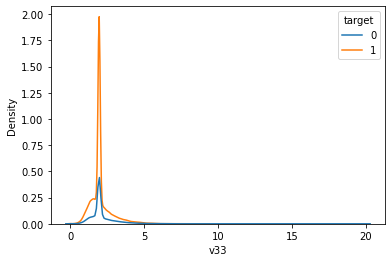

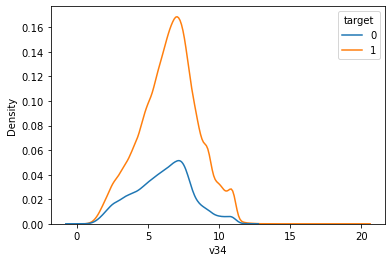

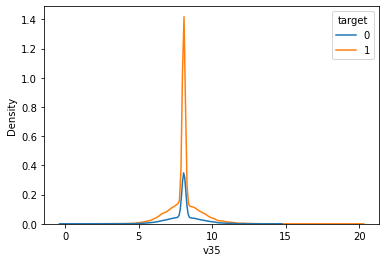

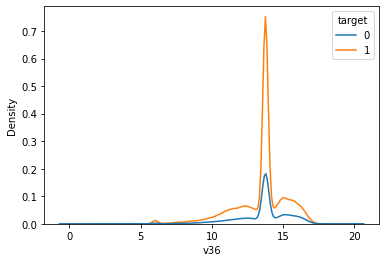

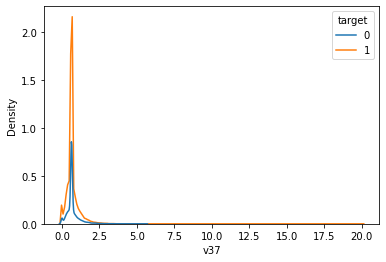

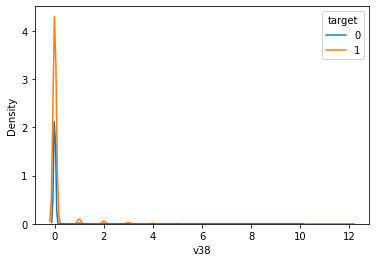

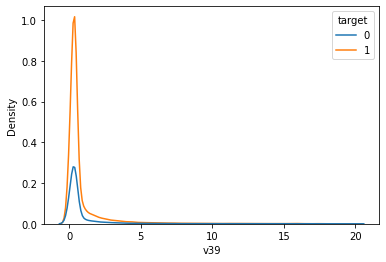

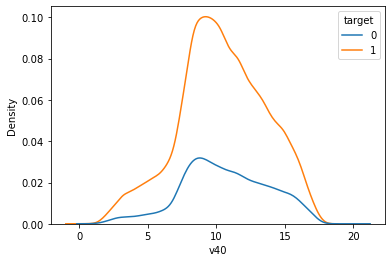

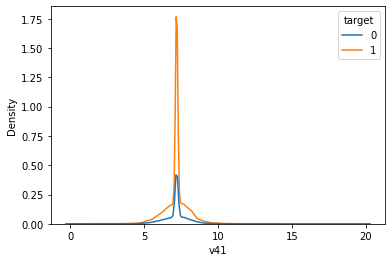

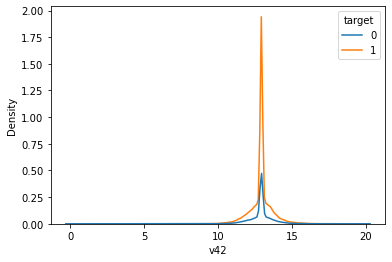

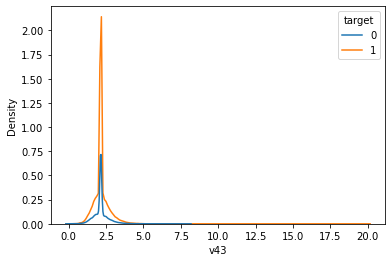

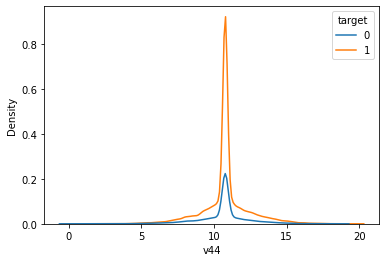

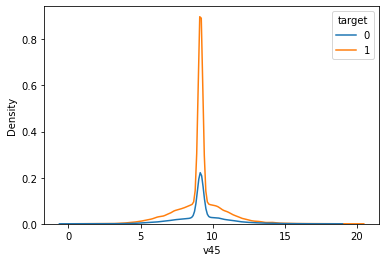

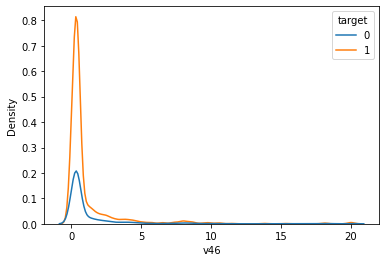

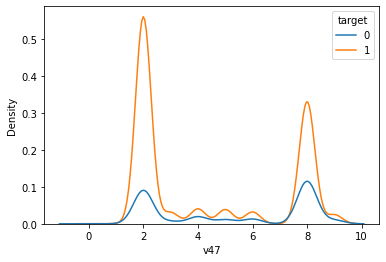

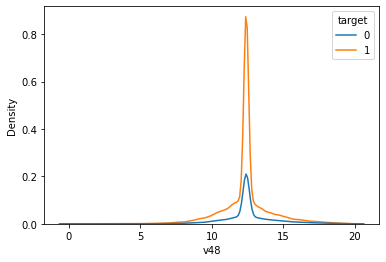

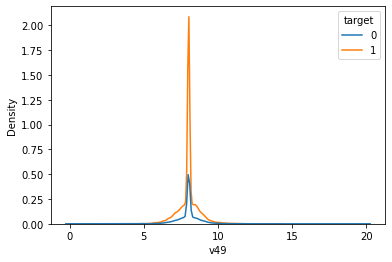

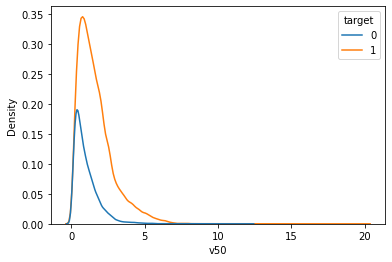

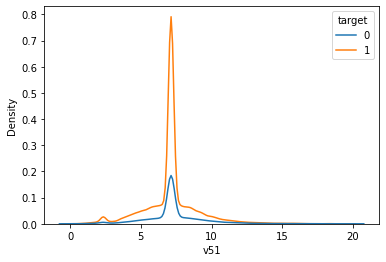

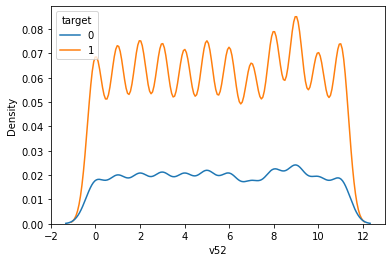

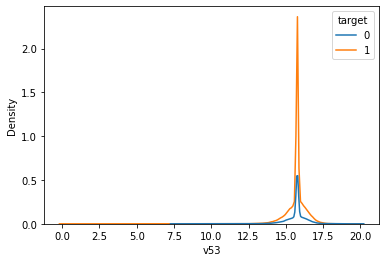

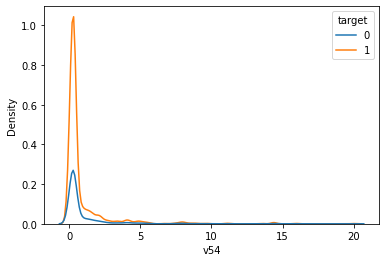

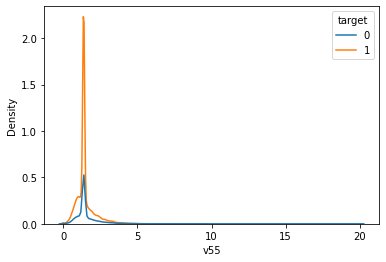

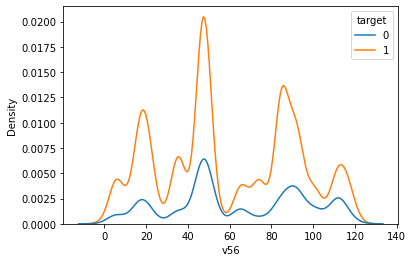

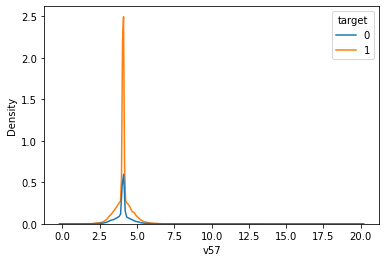

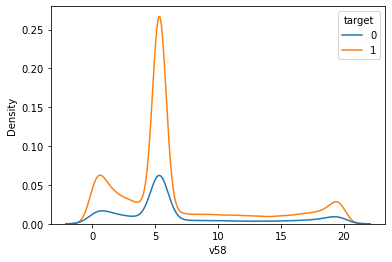

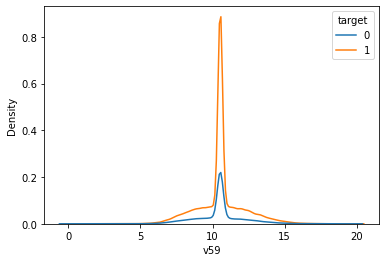

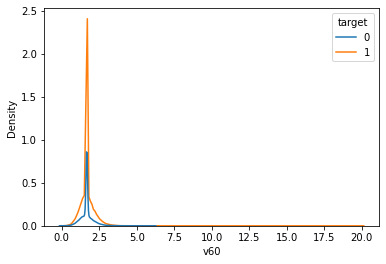

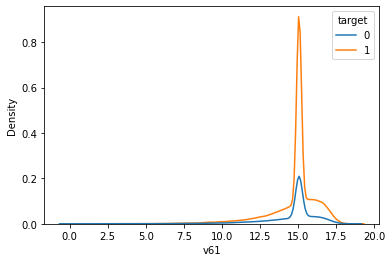

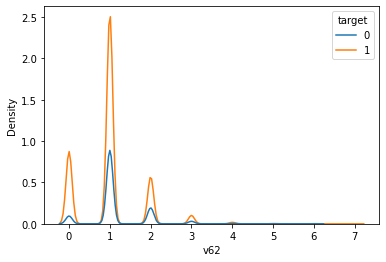

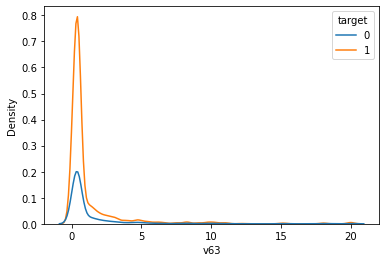

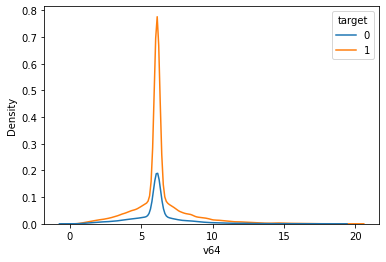

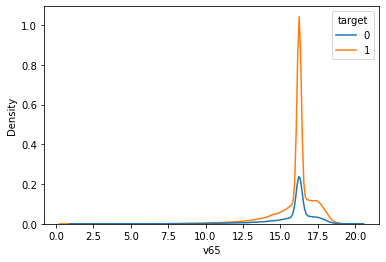

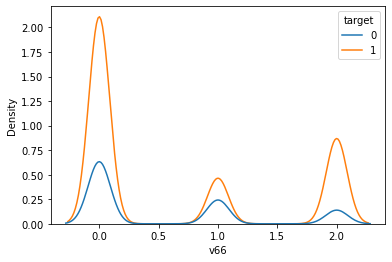

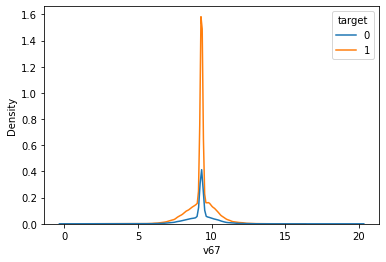

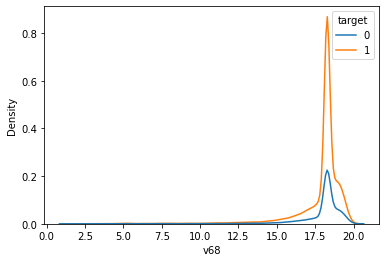

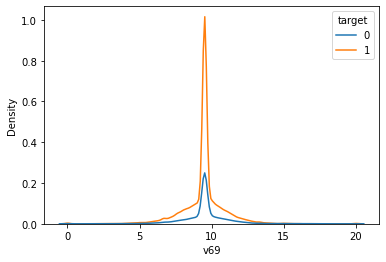

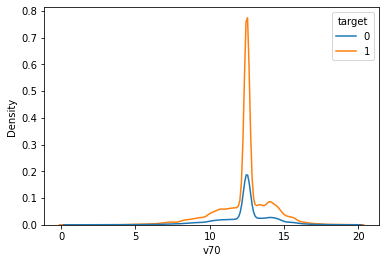

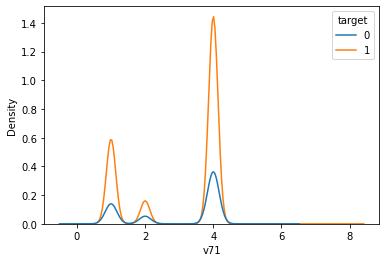

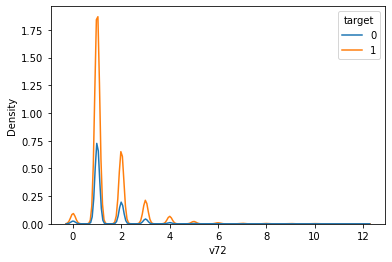

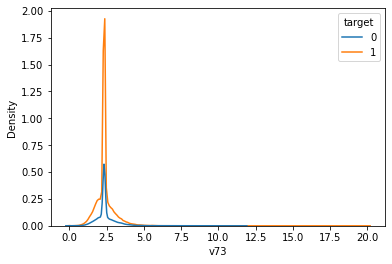

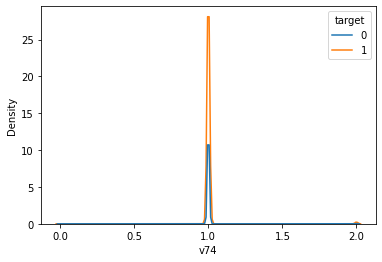

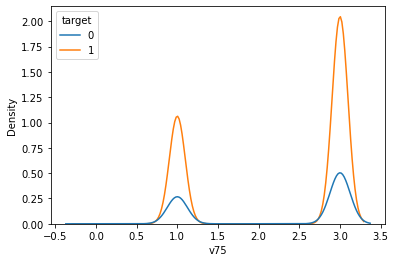

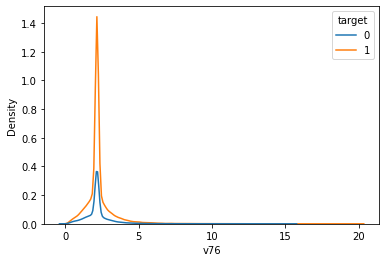

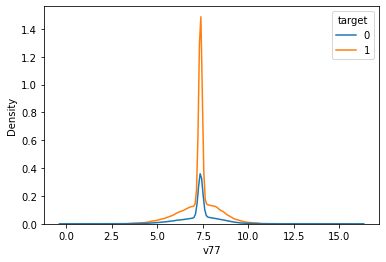

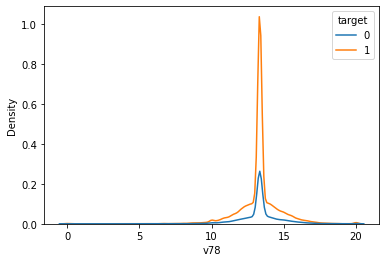

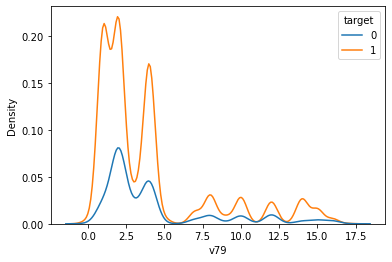

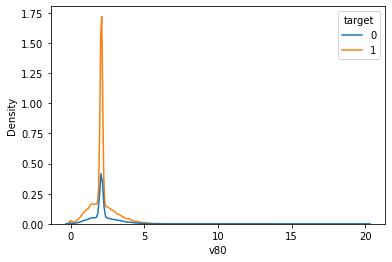

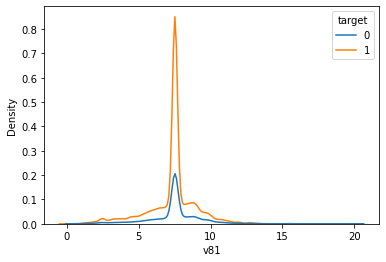

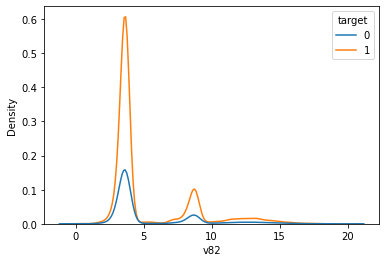

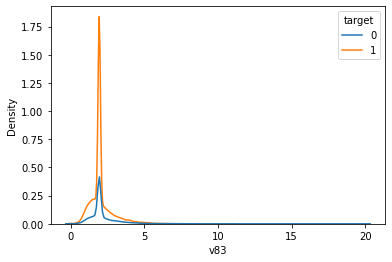

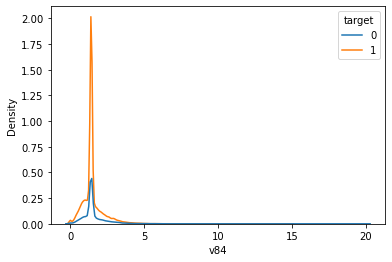

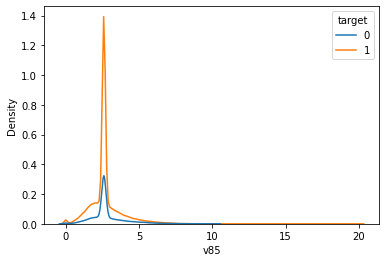

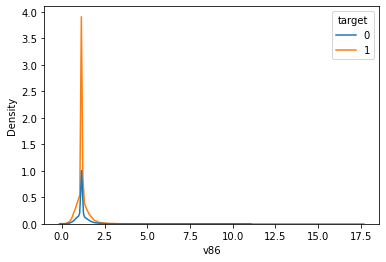

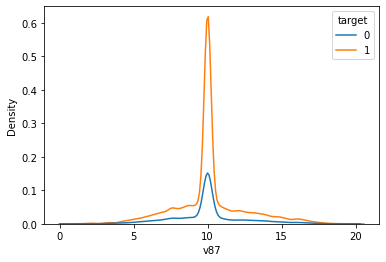

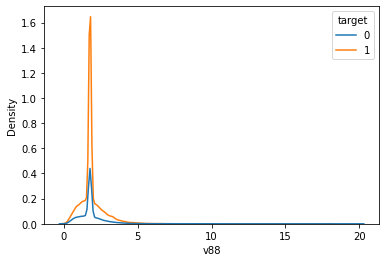

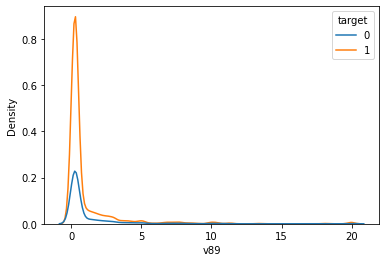

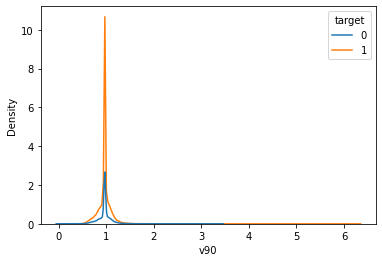

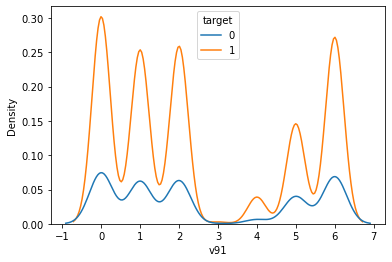

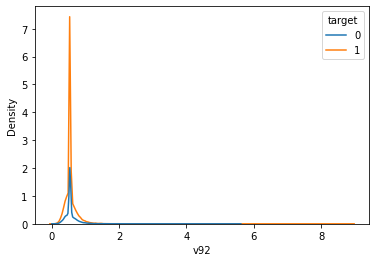

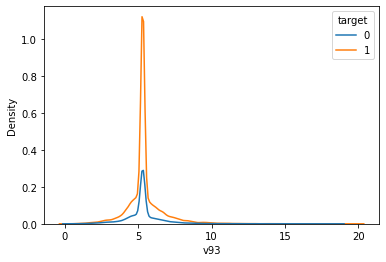

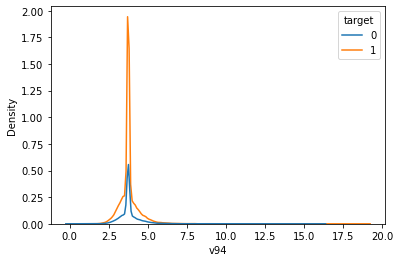

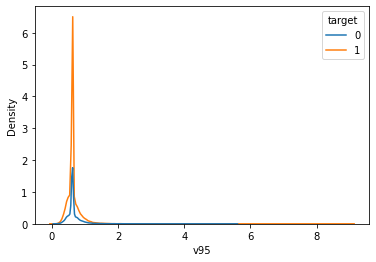

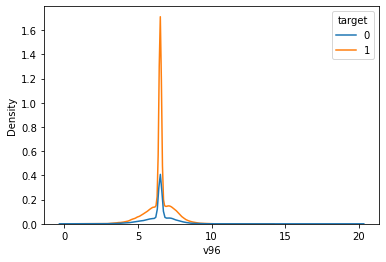

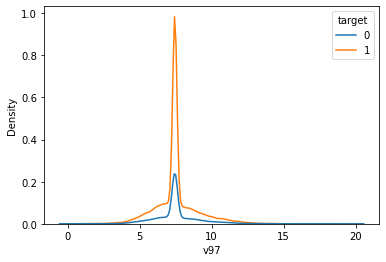

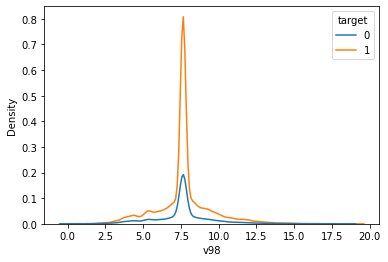

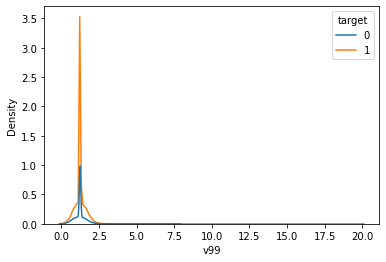

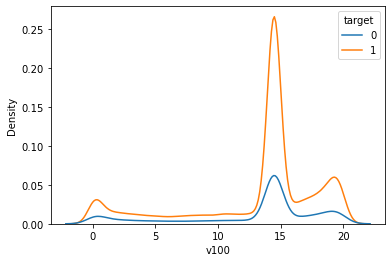

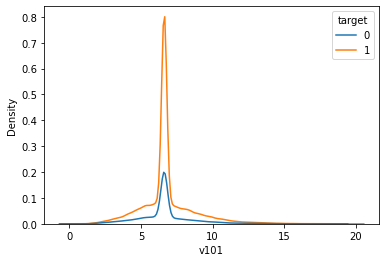

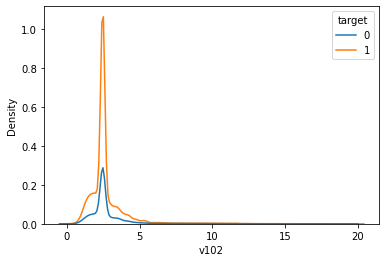

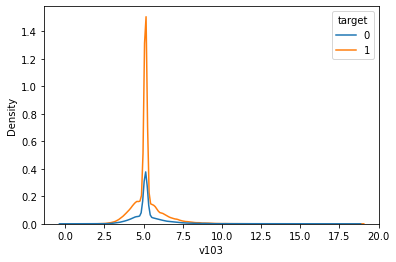

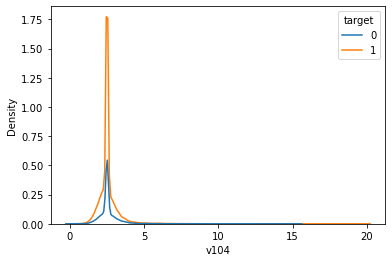

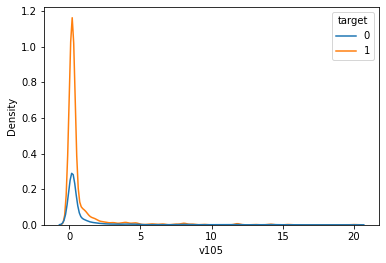

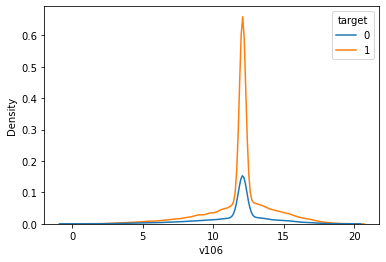

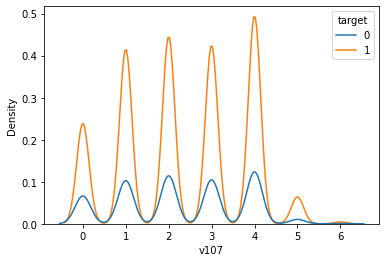

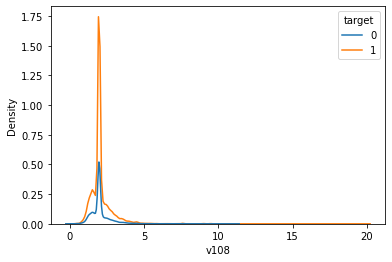

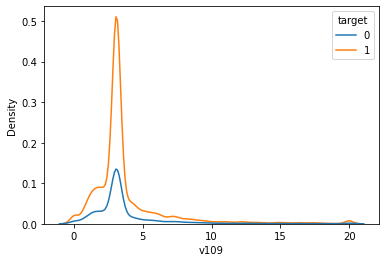

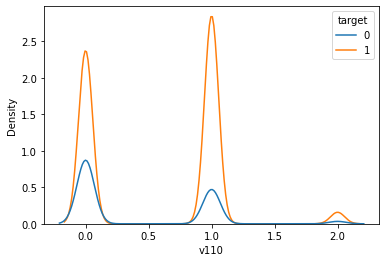

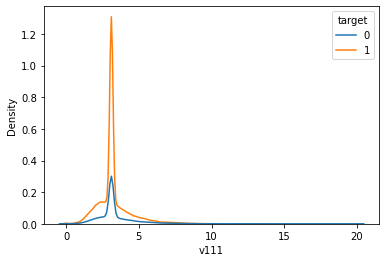

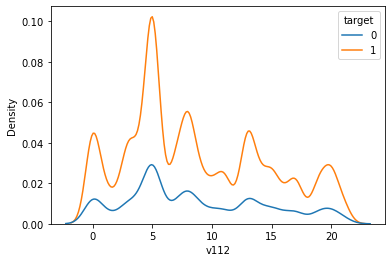

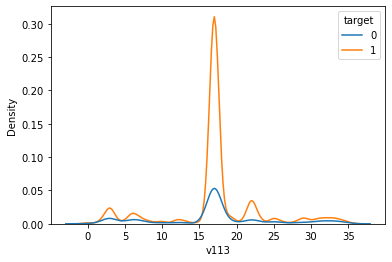

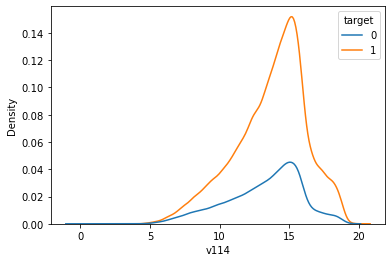

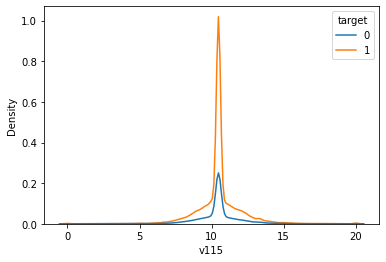

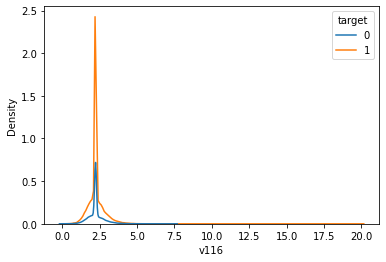

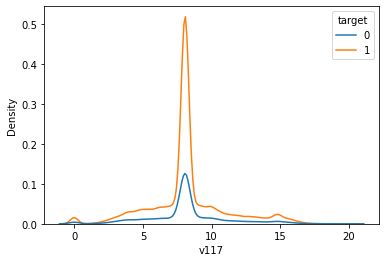

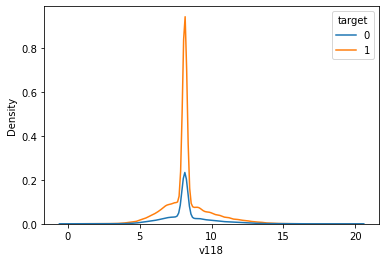

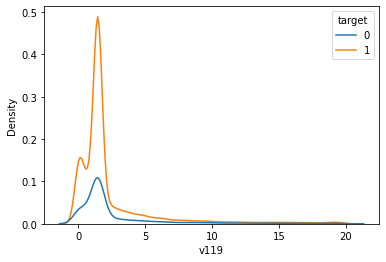

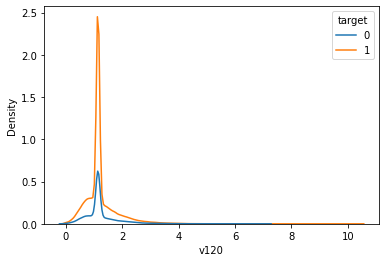

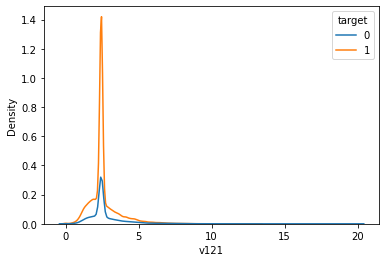

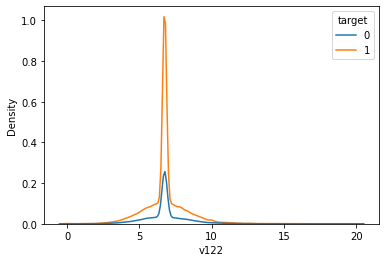

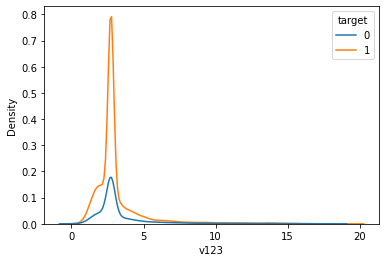

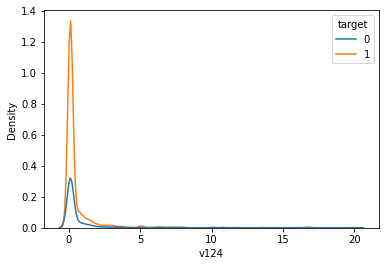

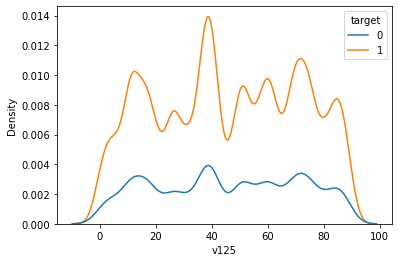

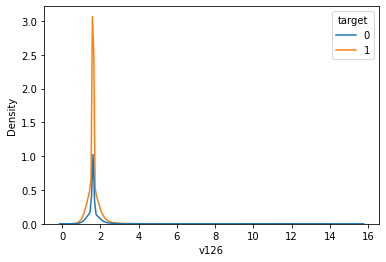

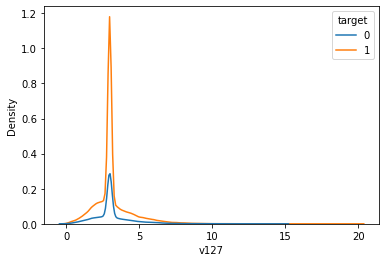

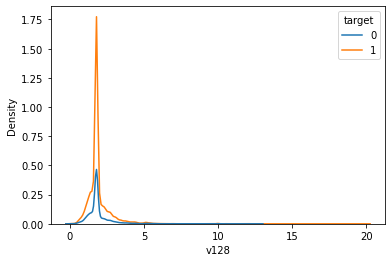

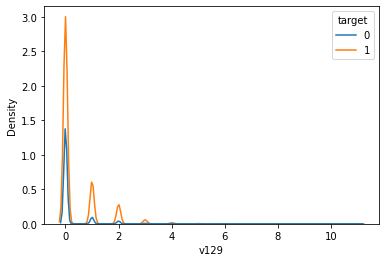

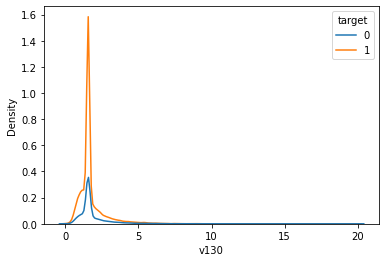

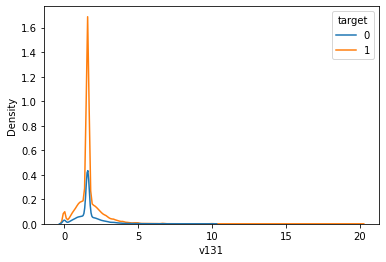

In [28]:
for i in range(len(colnames)):
    sns.kdeplot(data=df, x=colnames[i], hue="target")
    plt.show()